# ※ 필요한 패키지 및 데이터 불러오기

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('output/daegu.csv', encoding = 'cp949')

In [3]:
df_pre = pd.read_csv('output/daegu_pre.csv')

<hr>

# Preprocessing
#### Period
- 2022-05-06

#### Index
0. 전처리 전

1. Column : hour
2. Column : lightning
3. Column : condtion
4. Column : month
5. 전처리 후

# 0. 전처리 전

In [18]:
df

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0.0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,100.0,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,200.0,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,300.0,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,400.0,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,1900.0,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,2000.0,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,2100.0,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,2200.0,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [5]:
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

NameError: name 'df' is not defined

In [ ]:
df1

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [4]:
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

NameError: name 'df1' is not defined

In [ ]:
df2

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [4]:
df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

NameError: name 'df2' is not defined

In [ ]:
df3

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4.0,2022,구지면


## 4. Column : month
- 월을 정수형으로 표현

In [ ]:
df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [ ]:
df4

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


## 5. 전처리 후

In [ ]:
df_final = df4
df_final

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


In [ ]:
df5 = df4[:]

df5['temp_F'] = df5['temp'] * 1.8 + 32

df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidity'] + .00085282*df5['temp_F']*df5['humidity']*df5['humidity'] - .00000199*df5['temp_F']*df5['temp_F']*df5['humidity']*df5['humidity']

index = list(df5[(df5['humidity'] <= 13) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 112)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] - ((13 - df5.loc[index,'humidity']) / 4) * ((17 - abs(df5.loc[index,'temp_F'] - 95)) / 17) ** 0.5

index = list(df5[(df5['humidity'] > 85) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 87)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] + 0.02 * (df5.loc[index,'humidity'] - 85) * (87 - df5.loc[index,'temp_F'])

df5['A'] = -10.3 + 1.1 * df5['temp_F'] + 0.047 * df5['humidity']
index = list(df5.loc[df5['A'] < 79].index)
df5.loc[index,'HI'] = df5.loc[index,'A']

index = list(df5.loc[df5['temp_F'] < 40].index)
df5.loc[index,'HI'] = df5.loc[index,'temp_F']

df5.drop(columns = ['A'], axis=1, inplace=True)
df5.drop(columns = 'temp_F', axis=1, inplace=True)
df5['HI'] = (df5['HI'] - 32) / 1.8
df5

C:\Users\User\AppData\Local\Temp\ipykernel_24644\2801911579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['temp_F'] = df5['temp'] * 1.8 + 32
C:\Users\User\AppData\Local\Temp\ipykernel_24644\2801911579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444


In [ ]:
# 전처리된 데이터프레임을 저장한 뒤 이후에는 해당 파일을 불러서 사용
df_final.to_csv('daegu_pre.csv', index_label=False)

KeyboardInterrupt: 

In [ ]:
df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')
df_region

C:\Users\User\AppData\Local\Temp\ipykernel_24644\2812696719.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')


,1단계,2단계,3단계
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
1044924,NaN,NaN,NaN
1044925,NaN,NaN,NaN
1044926,NaN,NaN,NaN
1044927,NaN,NaN,NaN


In [ ]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [ ]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [ ]:
df5

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444


In [ ]:
df_11 = df5.merge(df_region, on='region')

In [ ]:
df_11

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,region2
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,중구
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,중구
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,중구
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,중구
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444,달성군
14727164,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778,달성군
14727165,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333,달성군
14727166,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444,달성군


<hr>

# EDA

#### Period
- 2022-05-06 ~ ???

#### Index
0. 기본적인 데이터 탐색

1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
4. 기저질환 환자가 온열질환 취약계층이다.
5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)

## 0. 기본적인 데이터 탐색
- made by SSJ

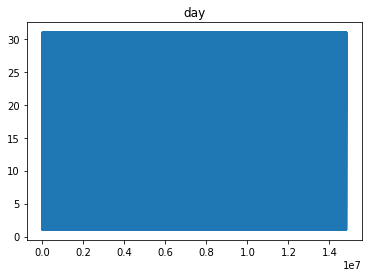

In [ ]:

plt.plot(df_final['day'])
plt.title('day')
plt.show()

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 

# 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
- made by 

# 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
- made by 

In [27]:
import pandas as pd
import numpy as np

In [28]:
# 날씨데이터 로드
dg_wether=pd.read_csv('output/daegu_final.csv', encoding='utf-8')
dg_wether

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598


In [29]:
# 대구 지역파일 로드
df_region=pd.read_csv('./dataset/Daegu/0 REGION.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_23432\2287578436.py:2: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region=pd.read_csv('./dataset/Daegu/0 REGION.csv')


In [33]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [34]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [35]:
# 날씨와 지역파일 통합
weth = dg_wether.merge(df_region, on='region')
weth

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,region2
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355,중구
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431,중구
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038,중구
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772,중구
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503,달성군
14727164,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350,달성군
14727165,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241,달성군
14727166,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598,달성군


In [36]:
weth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14727168 entries, 0 to 14727167
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   year            int64  
 1   month           int64  
 2   day             int64  
 3   hour            int64  
 4   datetime        object 
 5   temp            float64
 6   rainfall        float64
 7   lightning       int64  
 8   humidity        float64
 9   wind_speed      float64
 10  wind_direction  float64
 11  condition       int64  
 12  region          object 
 13  HI              float64
 14  DI              float64
 15  region2         object 
dtypes: float64(7), int64(6), object(3)
memory usage: 1.9+ GB


In [37]:
# 연도, 시군구, 읍면리를 기준으로 그룹화하여 온도, 습도, 열지수, 불쾌지수 평균
weth.groupby(['year', 'region2', 'region'], as_index=False)['temp', 'humidity', 'HI', 'DI'].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_23432\1903808133.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weth.groupby(['year', 'region2', 'region'], as_index=False)['temp', 'humidity', 'HI', 'DI'].mean()


,year,region2,region,temp,humidity,HI,DI
0,2010,남구,대명10동,18.524416,64.646417,19.267830,64.434464
1,2010,남구,대명11동,18.524416,64.646417,19.267830,64.434464
2,2010,남구,대명1동,18.271826,64.650019,18.872510,64.068680
3,2010,남구,대명2동,18.271826,64.650019,18.872510,64.068680
4,2010,남구,대명3동,18.271826,64.650019,18.872510,64.068680
...,...,...,...,...,...,...,...
1828,2022,중구,동인동,7.519896,44.989757,6.614786,49.253470
1829,2022,중구,삼덕동,7.528646,45.107465,6.625383,49.252173
1830,2022,중구,성내1동,7.528646,45.107465,6.625383,49.252173
1831,2022,중구,성내2동,7.528646,45.107465,6.625383,49.252173


In [38]:
# 계약종별 전력사용량 데이터 로드 (2013' - 2022'03)
dg_elec=pd.read_csv('./dataset/Daegu/deagu_electrocity.csv', encoding='utf-8')
dg_elec

,년도,월,시도,시군구,행정동코드,계약종별,고객호수,전력사용량
0,2013,1,대구광역시,남구,이천동,심야,131,292263.0
1,2013,1,대구광역시,남구,이천동,가로등,172,63912.0
2,2013,1,대구광역시,남구,이천동,교육용,5호미만제거,NaN
3,2013,1,대구광역시,남구,이천동,농사용,5호미만제거,NaN
4,2013,1,대구광역시,남구,이천동,산업용,17,56033.0
...,...,...,...,...,...,...,...,...
186067,2021,12,대구광역시,중구,성내3동,농사용,23,24539.0
186068,2021,12,대구광역시,중구,성내3동,산업용,555,997678.0
186069,2021,12,대구광역시,중구,성내3동,심야,254,394464.0
186070,2021,12,대구광역시,중구,성내3동,일반용,5464,15530181.0


In [39]:
# 컬럼명 변경
dg_elec.columns=['year', 'month', 'city', 'region2', 'region', 'contract type', 'customer', 'elec_use']
dg_elec

,year,month,city,region2,region,contract type,customer,elec_use
0,2013,1,대구광역시,남구,이천동,심야,131,292263.0
1,2013,1,대구광역시,남구,이천동,가로등,172,63912.0
2,2013,1,대구광역시,남구,이천동,교육용,5호미만제거,NaN
3,2013,1,대구광역시,남구,이천동,농사용,5호미만제거,NaN
4,2013,1,대구광역시,남구,이천동,산업용,17,56033.0
...,...,...,...,...,...,...,...,...
186067,2021,12,대구광역시,중구,성내3동,농사용,23,24539.0
186068,2021,12,대구광역시,중구,성내3동,산업용,555,997678.0
186069,2021,12,대구광역시,중구,성내3동,심야,254,394464.0
186070,2021,12,대구광역시,중구,성내3동,일반용,5464,15530181.0


In [40]:
# NULL 확인
dg_elec.isna().sum()

year                 0
month                0
city                 0
region2              0
region               0
contract type        0
customer             0
elec_use         31547
dtype: int64

In [41]:
# 고객호수 5호미만제거 NULL값으로 대체
dg_elec.replace('5호미만제거', np.nan, inplace=True)
dg_elec

,year,month,city,region2,region,contract type,customer,elec_use
0,2013,1,대구광역시,남구,이천동,심야,131,292263.0
1,2013,1,대구광역시,남구,이천동,가로등,172,63912.0
2,2013,1,대구광역시,남구,이천동,교육용,NaN,NaN
3,2013,1,대구광역시,남구,이천동,농사용,NaN,NaN
4,2013,1,대구광역시,남구,이천동,산업용,17,56033.0
...,...,...,...,...,...,...,...,...
186067,2021,12,대구광역시,중구,성내3동,농사용,23,24539.0
186068,2021,12,대구광역시,중구,성내3동,산업용,555,997678.0
186069,2021,12,대구광역시,중구,성내3동,심야,254,394464.0
186070,2021,12,대구광역시,중구,성내3동,일반용,5464,15530181.0


In [42]:
# NULL 삭제
dg_elec=dg_elec.dropna()

In [43]:
dg_elec.isna().sum()

year             0
month            0
city             0
region2          0
region           0
contract type    0
customer         0
elec_use         0
dtype: int64

In [44]:
# customer 타입 변경 object -> float64
dg_elec = dg_elec.astype({'customer':'float64'})
dg_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154525 entries, 0 to 186071
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           154525 non-null  int64  
 1   month          154525 non-null  int64  
 2   city           154525 non-null  object 
 3   region2        154525 non-null  object 
 4   region         154525 non-null  object 
 5   contract type  154525 non-null  object 
 6   customer       154525 non-null  float64
 7   elec_use       154525 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.6+ MB


In [45]:
dg_elec[dg_elec['region']=='달성군']

,year,month,city,region2,region,contract type,customer,elec_use


In [46]:
dg_elec.loc[dg_elec['region'] == '달성군', 'region'] = '구지면'
dg_elec.loc[dg_elec['region2'] == '구지면', 'region2'] = '달성군'

In [47]:
# region 컬럼의 화원읍 성산리 -> region_1, region_2로 분리
dg_elec['region_1']=dg_elec['region'].str.split(' ').str[0]
#dg_elec['region_2']=dg_elec['region'].str.split(' ').str[1]
dg_elec

,year,month,city,region2,region,contract type,customer,elec_use,region_1
0,2013,1,대구광역시,남구,이천동,심야,131.0,292263.0,이천동
1,2013,1,대구광역시,남구,이천동,가로등,172.0,63912.0,이천동
4,2013,1,대구광역시,남구,이천동,산업용,17.0,56033.0,이천동
5,2013,1,대구광역시,남구,이천동,일반용,477.0,1499114.0,이천동
6,2013,1,대구광역시,남구,이천동,주택용,2569.0,1491070.0,이천동
...,...,...,...,...,...,...,...,...,...
186067,2021,12,대구광역시,중구,성내3동,농사용,23.0,24539.0,성내3동
186068,2021,12,대구광역시,중구,성내3동,산업용,555.0,997678.0,성내3동
186069,2021,12,대구광역시,중구,성내3동,심야,254.0,394464.0,성내3동
186070,2021,12,대구광역시,중구,성내3동,일반용,5464.0,15530181.0,성내3동


In [48]:
# 전력데이터 지역 값 확인
uniq=dg_elec['region_1'].unique()
uniq.sort()
print(uniq)
print(len(uniq))

['가창면' '감삼동' '검단동' '검사1동' '검사동' '고산1동' '고산2동' '고산3동' '고성동' '공산1동' '공산2동'
 '공산동' '관문동' '관음동' '구지면' '국우동' '남산1동' '남산2동' '남산3동' '남산4동' '내당1동' '내당2,3동'
 '내당4동' '노곡동' '노원1,2동' '노원3동' '노원동' '논공읍' '논공읍공단출장소' '다사읍' '다사읍서재출장소'
 '대곡동' '대명10동' '대명11동' '대명1동' '대명2,8동' '대명3,7동' '대명4동' '대명5동' '대명6동'
 '대명7동' '대명8동' '대명9동' '대봉1동' '대봉2동' '대신1동' '대신2동' '대현동' '도동' '도원동' '도평동'
 '동인1,2,4가동' '동인동' '동천동' '두류1.2동' '두류1동' '두류2동' '두류3동' '두산동' '둔산동' '둔산부동'
 '만촌1동' '만촌2동' '만촌3동' '매호동' '무태조야동' '방촌동' '범물1동' '범물2동' '범어1동' '범어2동'
 '범어3동' '범어4동' '복현1동' '복현2동' '본동' '본리동' '봉덕1동' '봉덕2동' '봉덕3동' '봉무동'
 '불로.봉무동' '불로동' '비산1동' '비산2,3동' '비산3동' '비산4동' '비산5동' '비산6동' '비산7동' '산격1동'
 '산격2동' '산격3동' '산격4동' '삼덕동' '상동' '상인1동' '상인2동' '상인3동' '상중이동' '성내1동' '성내2동'
 '성내3동' '성당1동' '성당2동' '성당동' '성서1동' '성서3동' '송정동' '송현1동' '송현2동' '수성2.3가동'
 '수성4가동' '수성동1가' '수성동2가' '수성동3가' '수성동4가' '신당동' '신암1동' '신암2동' '신암3동' '신암4동'
 '신암5동' '신천1동' '신천2동' '신천3동' '신천4동' '신평동' '안심1동' '안심2동' '안심3동' '안심4동'
 '옥포면' '옥포읍' '용산2동' '원대동' '월성1동' '월성2동' '유가면' '유가읍' '유천동' '읍내동'

In [49]:
# 날씨 데이터의 region 값 확인
w_r=weth['region'].unique()
w_r.tolist()
w_r.sort()
print(w_r)
print(len(w_r))

['가창면' '감삼동' '검단동' '고산1동' '고산2동' '고산3동' '고성동' '공산동' '관문동' '관음동' '구암동'
 '구지면' '국우동' '남산1동' '남산2동' '남산3동' '남산4동' '내당1동' '내당2.3동' '내당4동' '노원동'
 '논공읍' '다사읍' '대명10동' '대명11동' '대명1동' '대명2동' '대명3동' '대명4동' '대명5동' '대명6동'
 '대명9동' '대봉1동' '대봉2동' '대신동' '대현동' '도원동' '도평동' '동인동' '동천동' '동촌동' '두류1.2동'
 '두류3동' '두산동' '만촌1동' '만촌2동' '만촌3동' '무태조야동' '방촌동' '범물1동' '범물2동' '범어1동'
 '범어2동' '범어3동' '범어4동' '복현1동' '복현2동' '본동' '본리동' '봉덕1동' '봉덕2동' '봉덕3동'
 '불로.봉무동' '비산1동' '비산2.3동' '비산4동' '비산5동' '비산6동' '비산7동' '산격1동' '산격2동' '산격3동'
 '산격4동' '삼덕동' '상동' '상인1동' '상인2동' '상인3동' '상중이동' '성내1동' '성내2동' '성내3동' '성당동'
 '송현1동' '송현2동' '수성1가동' '수성2.3가동' '수성4가동' '신당동' '신암1동' '신암2동' '신암3동' '신암4동'
 '신암5동' '신천1.2동' '신천3동' '신천4동' '안심1동' '안심2동' '안심3동' '안심4동' '옥포읍' '용산1동'
 '용산2동' '원대동' '월성1동' '월성2동' '유가읍' '읍내동' '이곡1동' '이곡2동' '이천동' '장기동' '죽전동'
 '중동' '지산1동' '지산2동' '지저동' '진천동' '칠성동' '침산1동' '침산2동' '침산3동' '태전1동' '태전2동'
 '파동' '평리1동' '평리2동' '평리3동' '평리4동' '평리5동' '평리6동' '하빈면' '해안동' '혁신동' '현풍읍'
 '화원읍' '황금1동' '황금2동' '효목1동' '효목2동']
141


In [50]:
# 전력데이터와 날씨데이터 region 값 비교
test = [i for i in uniq if i not in w_r]
print(test)
len(test)

['검사1동', '검사동', '공산1동', '공산2동', '내당2,3동', '노곡동', '노원1,2동', '노원3동', '논공읍공단출장소', '다사읍서재출장소', '대곡동', '대명2,8동', '대명3,7동', '대명7동', '대명8동', '대신1동', '대신2동', '도동', '동인1,2,4가동', '두류1동', '두류2동', '둔산동', '둔산부동', '매호동', '봉무동', '불로동', '비산2,3동', '비산3동', '성당1동', '성당2동', '성서1동', '성서3동', '송정동', '수성동1가', '수성동2가', '수성동3가', '수성동4가', '신천1동', '신천2동', '신평동', '옥포면', '유가면', '유천동', '이곡동', '이천2동', '입석동', '칠곡1동', '칠곡2동', '칠곡3동', '태전동', '평광동', '현풍면']


52

전력데이터 지역이름 변경 및 통합 목록
1. 내당2,3동을 '내당2.3동'으로 변경  
1. 신천1동과 2동을 '신천1.2동'으로 통합  
1. 대명2,8동을 '대명2동'으로 변경  
1. 대명3,7동을 '대명3동'으로 변경  
1. 대신1동과 2동을 '대신동'으로 통합  
1. 비산2,3동을 '비산2.3동'으로 변경, 비산3동 -> 비산2.3동
1. 수성동1가를 '수성1가동'으로 변경  
1. 이곡동을 '이곡1동'으로 변경  
1. 태전동을 '태전1동'으로 변경  
1. 검사동,검사1동,입석동을 '동촌동'으로 통합
1. 칠곡1동 구암동, 칠곡2동 관문동, 칠곡3동 국우동
1. 공산1동, 공산2동 -> 공산동 
1. 불로동+봉무동 = 불로.봉무동
1. 논공읍서재출장소 -> 논공읍
1. 다사읍서재출장소 -> 다사읍
1. 동인1,2,4가동 -> 동인동
1. 대명7동-> 대명3동
1. 대명8동 -> 대명2동
1. 두류1동, 두류2동 -> 두류1.2동
1. 수성동2가,수성동3가 -> 수성2.3가동
1. 수성동1가 -> 수성1가동
1. 수성동4가 -> 수성4가동
1. 성당1동, 성당2동 -> 성당동
1. 노곡동 -> 관문동
1. 대곡동 -> 성내동
1. 도동 -> 도평동
1. 매호동 -> 고산3동
1. 송정동 -> 공산동
1. 신평동 -> 해안동
1. 유가면 -> 유가읍
1. 이천2동 -> 이천동
1. 평광동 -> 도평동
1. 비산3동 -> 비산2.3동
1. 유천동->유천동(流川洞), 월성동(月城洞), 대천동(大泉洞), 월암동(月岩洞) : 월성1동 일부라 월성1동으로 변경 

In [51]:
# 동이름 변경
dg_elec.loc[dg_elec['region_1'] == '내당2,3동', 'region_1'] = '내당2.3동'
dg_elec.loc[dg_elec['region_1'] == '대명2,8동', 'region_1'] = '대명2동'
dg_elec.loc[dg_elec['region_1'] == '대명3,7동', 'region_1'] = '대명3동'
dg_elec.loc[dg_elec['region_1'] == '비산2,3동', 'region_1'] = '비산2.3동'
dg_elec.loc[dg_elec['region_1'] == '수성동1가', 'region_1'] = '수성1가동'
dg_elec.loc[dg_elec['region_1'] == '이곡동', 'region_1'] = '이곡1동'
dg_elec.loc[dg_elec['region_1'] == '태전동', 'region_1'] = '태전1동'
dg_elec.loc[dg_elec['region_1'] == '칠곡1동', 'region_1'] = '구암동'
dg_elec.loc[dg_elec['region_1'] == '칠곡2동', 'region_1'] = '관문동'
dg_elec.loc[dg_elec['region_1'] == '칠곡3동', 'region_1'] = '국우동'
dg_elec.loc[dg_elec['region_1'] == '논공읍공단출장소', 'region_1'] = '논공읍'
dg_elec.loc[dg_elec['region_1'] == '다사읍서재출장소', 'region_1'] = '다사읍'
dg_elec.loc[dg_elec['region_1'] == '현풍면', 'region_1'] = '현풍읍'
dg_elec.loc[dg_elec['region_1'] == '옥포면', 'region_1'] = '옥포읍'
dg_elec.loc[dg_elec['region_1'] == '동인1,2,4가동', 'region_1'] = '동인동'
dg_elec.loc[dg_elec['region_1'] == '대명7동', 'region_1'] = '대명3동'
dg_elec.loc[dg_elec['region_1'] == '대명8동', 'region_1'] = '대명2동'
dg_elec.loc[dg_elec['region_1'] == '수성동1가', 'region_1'] = '수성1가동'
dg_elec.loc[dg_elec['region_1'] == '수성동4가', 'region_1'] = '수성4가동'
dg_elec.loc[dg_elec['region_1'] == '노곡동', 'region_1'] = '관문동'
dg_elec.loc[dg_elec['region_1'] == '대곡동', 'region_1'] = '성내동'
dg_elec.loc[dg_elec['region_1'] == '도동', 'region_1'] = '도평동'
dg_elec.loc[dg_elec['region_1'] == '매호동', 'region_1'] = '고산3동'
dg_elec.loc[dg_elec['region_1'] == '송정동', 'region_1'] = '공산동'
dg_elec.loc[dg_elec['region_1'] == '신평동', 'region_1'] = '해안동'
dg_elec.loc[dg_elec['region_1'] == '이천2동', 'region_1'] = '이천동'
dg_elec.loc[dg_elec['region_1'] == '평광동', 'region_1'] = '도평동'
dg_elec.loc[dg_elec['region_1'] == '유가면', 'region_1'] = '유가읍'
dg_elec.loc[dg_elec['region_1'] == '비산3동', 'region_1'] = '비산2.3동'
dg_elec.loc[dg_elec['region_1'] == '유천동', 'region_1'] = '월성1동'

In [52]:
# 동이름 통합
dg_elec.loc[(dg_elec['region_1'] == '신천1동') | (dg_elec['region_1'] == '신천2동'), 'region_1'] = '신천1.2동'
dg_elec.loc[(dg_elec['region_1'] == '대신1동') | (dg_elec['region_1'] == '대신2동'), 'region_1'] = '대신동'
dg_elec.loc[(dg_elec['region_1'] == '검사동') | (dg_elec['region_1'] == '검사1동') | (dg_elec['region_1'] == '입석동'), 'region_1'] = '동촌동'
dg_elec.loc[(dg_elec['region_1'] == '공산1동') | (dg_elec['region_1'] == '공산2동'), 'region_1'] = '공산동'
dg_elec.loc[(dg_elec['region_1'] == '불로동') | (dg_elec['region_1'] == '봉무동'), 'region_1'] = '불로.봉무동'
dg_elec.loc[(dg_elec['region_1'] == '노원1,2동') | (dg_elec['region_1'] == '노원3동'), 'region_1'] = '노원동'
dg_elec.loc[(dg_elec['region_1'] == '두류1동') | (dg_elec['region_1'] == '두류2동'), 'region_1'] = '두류1.2동'
dg_elec.loc[(dg_elec['region_1'] == '수성동2가') | (dg_elec['region_1'] == '수성동3가'), 'region_1'] = '수성2.3가동'
dg_elec.loc[(dg_elec['region_1'] == '성당1동') | (dg_elec['region_1'] == '성당2동'), 'region_1'] = '성당동'

- 둔산동 날씨 데이터에 없음 -> 삭제
- 둔산부동 날씨 데이터에 없음 -> 삭제
- 성내동->성내1동,성내2동,성내3동 (전력, 날씨)
- 성서1동->용산1동, 용산2동
        전력, 날씨데이터 용산동으로 통일
- 성서3동->이곡1동, 이곡2동
        전력, 날씨데이터 이곡동으로 통일

In [53]:
# 전력데이터 성내1동, 성내2동, 성내3동 -> 성내동으로 통합
dg_elec.loc[(dg_elec['region_1'] == '성내1동') | (dg_elec['region_1'] == '성내2동') | (dg_elec['region_1'] == '성내3동'), 'region_1'] = '성내동'
# 전력데이터 성서1동 -> 용산동 / 성서3동 -> 이곡동 변경
dg_elec.loc[dg_elec['region_1'] == '성서1동', 'region_1'] = '용산동'
dg_elec.loc[dg_elec['region_1'] == '용산2동', 'region_1'] = '용산동'
dg_elec.loc[dg_elec['region_1'] == '성서3동', 'region_1'] = '이곡동'
dg_elec.loc[(dg_elec['region_1'] == '이곡1동') | (dg_elec['region_1'] == '이곡2동'), 'region_1'] = '이곡동'

In [54]:
# 전력데이터 지역 값 확인
uniq1=dg_elec['region_1'].unique()
uniq1.sort()
print(uniq1)
print(len(uniq1))

['가창면' '감삼동' '검단동' '고산1동' '고산2동' '고산3동' '고성동' '공산동' '관문동' '관음동' '구암동'
 '구지면' '국우동' '남산1동' '남산2동' '남산3동' '남산4동' '내당1동' '내당2.3동' '내당4동' '노원동'
 '논공읍' '다사읍' '대명10동' '대명11동' '대명1동' '대명2동' '대명3동' '대명4동' '대명5동' '대명6동'
 '대명9동' '대봉1동' '대봉2동' '대신동' '대현동' '도원동' '도평동' '동인동' '동천동' '동촌동' '두류1.2동'
 '두류3동' '두산동' '둔산동' '둔산부동' '만촌1동' '만촌2동' '만촌3동' '무태조야동' '방촌동' '범물1동'
 '범물2동' '범어1동' '범어2동' '범어3동' '범어4동' '복현1동' '복현2동' '본동' '본리동' '봉덕1동' '봉덕2동'
 '봉덕3동' '불로.봉무동' '비산1동' '비산2.3동' '비산4동' '비산5동' '비산6동' '비산7동' '산격1동' '산격2동'
 '산격3동' '산격4동' '삼덕동' '상동' '상인1동' '상인2동' '상인3동' '상중이동' '성내동' '성당동' '송현1동'
 '송현2동' '수성1가동' '수성2.3가동' '수성4가동' '신당동' '신암1동' '신암2동' '신암3동' '신암4동' '신암5동'
 '신천1.2동' '신천3동' '신천4동' '안심1동' '안심2동' '안심3동' '안심4동' '옥포읍' '용산동' '원대동'
 '월성1동' '월성2동' '유가읍' '읍내동' '이곡동' '이천동' '장기동' '죽전동' '중동' '지산1동' '지산2동'
 '지저동' '진천동' '칠성동' '침산1동' '침산2동' '침산3동' '태전1동' '태전2동' '파동' '평리1동' '평리2동'
 '평리3동' '평리4동' '평리5동' '평리6동' '하빈면' '해안동' '혁신동' '현풍읍' '화원읍' '황금1동' '황금2동'
 '효목1동' '효목2동']
139


In [55]:
# 새 컬럼 region_1 만들기
weth['region_1']=weth['region']
weth

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,region2,region_1
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355,중구,동인동
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431,중구,동인동
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038,중구,동인동
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772,중구,동인동
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608,중구,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503,달성군,구지면
14727164,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350,달성군,구지면
14727165,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241,달성군,구지면
14727166,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598,달성군,구지면


In [56]:
# 날씨데이터 성내1동, 성내2동, 성내3동 -> 성내동/용산1동, 용산2동 -> 용산동/이곡1동, 이곡2동 -> 이곡동 으로 통합
weth.loc[(weth['region_1'] == '성내1동') | (weth['region_1'] == '성내2동') | (weth['region_1'] == '성내3동'), 'region_1'] = '성내동'
weth.loc[(weth['region_1'] == '용산1동') | (weth['region_1'] == '용산2동'), 'region_1'] = '용산동'
weth.loc[(weth['region_1'] == '이곡1동') | (weth['region_1'] == '이곡2동'), 'region_1'] = '이곡동'

KeyboardInterrupt: 

In [ ]:
# 날씨데이터 region_1 값 확인
w_r1=weth['region_1'].unique()
w_r1.sort()
print(w_r1)
print(len(w_r1))

['가창면' '감삼동' '검단동' '고산1동' '고산2동' '고산3동' '고성동' '공산동' '관문동' '관음동' '구암동'
 '구지면' '국우동' '남산1동' '남산2동' '남산3동' '남산4동' '내당1동' '내당2.3동' '내당4동' '노원동'
 '논공읍' '다사읍' '대명10동' '대명11동' '대명1동' '대명2동' '대명3동' '대명4동' '대명5동' '대명6동'
 '대명9동' '대봉1동' '대봉2동' '대신동' '대현동' '도원동' '도평동' '동인동' '동천동' '동촌동' '두류1.2동'
 '두류3동' '두산동' '만촌1동' '만촌2동' '만촌3동' '무태조야동' '방촌동' '범물1동' '범물2동' '범어1동'
 '범어2동' '범어3동' '범어4동' '복현1동' '복현2동' '본동' '본리동' '봉덕1동' '봉덕2동' '봉덕3동'
 '불로.봉무동' '비산1동' '비산2.3동' '비산4동' '비산5동' '비산6동' '비산7동' '산격1동' '산격2동' '산격3동'
 '산격4동' '삼덕동' '상동' '상인1동' '상인2동' '상인3동' '상중이동' '성내동' '성당동' '송현1동' '송현2동'
 '수성1가동' '수성2.3가동' '수성4가동' '신당동' '신암1동' '신암2동' '신암3동' '신암4동' '신암5동'
 '신천1.2동' '신천3동' '신천4동' '안심1동' '안심2동' '안심3동' '안심4동' '옥포읍' '용산동' '원대동'
 '월성1동' '월성2동' '유가읍' '읍내동' '이곡동' '이천동' '장기동' '죽전동' '중동' '지산1동' '지산2동'
 '지저동' '진천동' '칠성동' '침산1동' '침산2동' '침산3동' '태전1동' '태전2동' '파동' '평리1동' '평리2동'
 '평리3동' '평리4동' '평리5동' '평리6동' '하빈면' '해안동' '혁신동' '현풍읍' '화원읍' '황금1동' '황금2동'
 '효목1동' '효목2동']
137


In [ ]:
# 전력데이터와 날씨데이터 region 값 비교
test1 = [i for i in uniq1 if i not in w_r1]
print(test1)
print(len(test1))

['둔산동', '둔산부동']
2


In [ ]:
# 전력데이터 둔산동, 둔산부동 삭제
dg_elec.drop(dg_elec.loc[dg_elec['region']=='둔산동'].index, inplace=True)
dg_elec.drop(dg_elec.loc[dg_elec['region']=='둔산부동'].index, inplace=True)

In [57]:
# 둔산동 삭제 확인
dg_elec[dg_elec['region']=='둔산동']

,year,month,city,region2,region,contract type,customer,elec_use,region_1
134,2013,1,대구광역시,동구,둔산동,심야,62.0,187208.0,둔산동
135,2013,1,대구광역시,동구,둔산동,가로등,22.0,9982.0,둔산동
137,2013,1,대구광역시,동구,둔산동,농사용,252.0,35692.0,둔산동
138,2013,1,대구광역시,동구,둔산동,산업용,14.0,55939.0,둔산동
139,2013,1,대구광역시,동구,둔산동,일반용,49.0,42493.0,둔산동
...,...,...,...,...,...,...,...,...,...
182914,2021,10,대구광역시,동구,둔산동,농사용,308.0,71950.0,둔산동
182915,2021,10,대구광역시,동구,둔산동,산업용,21.0,74828.0,둔산동
182916,2021,10,대구광역시,동구,둔산동,일반용,85.0,64743.0,둔산동
182917,2021,10,대구광역시,동구,둔산동,주택용,287.0,45464.0,둔산동


In [58]:
# 둔산부동 삭제 확인
dg_elec[dg_elec['region']=='둔산부동']

,year,month,city,region2,region,contract type,customer,elec_use,region_1
335,2013,1,대구광역시,동구,둔산부동,심야,45.0,113553.0,둔산부동
336,2013,1,대구광역시,동구,둔산부동,가로등,14.0,15079.0,둔산부동
338,2013,1,대구광역시,동구,둔산부동,농사용,151.0,38261.0,둔산부동
339,2013,1,대구광역시,동구,둔산부동,산업용,15.0,82055.0,둔산부동
340,2013,1,대구광역시,동구,둔산부동,일반용,63.0,60289.0,둔산부동
...,...,...,...,...,...,...,...,...,...
183111,2021,10,대구광역시,동구,둔산부동,가로등,159.0,18522.0,둔산부동
183113,2021,10,대구광역시,동구,둔산부동,농사용,218.0,48648.0,둔산부동
183114,2021,10,대구광역시,동구,둔산부동,산업용,34.0,205807.0,둔산부동
183115,2021,10,대구광역시,동구,둔산부동,일반용,126.0,121613.0,둔산부동


In [77]:
e_group=dg_elec.groupby(['year', 'month', 'region_1', 'contract type'], as_index=False)['customer', 'elec_use'].sum()
e_group

C:\Users\User\AppData\Local\Temp\ipykernel_23432\3531722316.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  e_group=dg_elec.groupby(['year', 'month', 'region_1', 'contract type'], as_index=False)['customer', 'elec_use'].sum()


,year,month,region_1,contract type,customer,elec_use
0,2013,1,가창면,가로등,314.0,238587.0
1,2013,1,가창면,농사용,1088.0,302963.0
2,2013,1,가창면,산업용,90.0,7629701.0
3,2013,1,가창면,심야,524.0,1894274.0
4,2013,1,가창면,일반용,620.0,1811605.0
...,...,...,...,...,...,...
90382,2022,3,효목2동,농사용,16.0,736.0
90383,2022,3,효목2동,산업용,192.0,434184.0
90384,2022,3,효목2동,심야,1036.0,1381680.0
90385,2022,3,효목2동,일반용,8828.0,17322076.0


In [78]:
# 년도, 월 읍면동, 계약종을 기준으로 하여 전기사용량 합 구하기 -1
use_sum=dg_elec.groupby(['year', 'month', 'region_1', 'contract type'])['elec_use'].sum()
use_sum

year  month  region_1  contract type
2013  1      가창면       가로등                238587.0
                       농사용                302963.0
                       산업용               7629701.0
                       심야                1894274.0
                       일반용               1811605.0
                                           ...    
2022  3      효목2동      농사용                   736.0
                       산업용                434184.0
                       심야                1381680.0
                       일반용              17322076.0
                       주택용              12185256.0
Name: elec_use, Length: 90387, dtype: float64

In [79]:
# 년도, 월 읍면동을 기준으로 하여 전기사용량 합 구하기 -2 
region_sum=dg_elec.groupby(['year', 'month', 'region_1'])['elec_use'].sum()
region_sum

year  month  region_1
2013  1      가창면          12725055.0
             감삼동          11416379.0
             검단동          17750384.0
             고산1동         15776474.0
             고산2동          9078256.0
                            ...     
2022  3      현풍읍         197574082.0
             화원읍          35618052.0
             황금1동         65441484.0
             황금2동        306254036.0
             효목2동         32693520.0
Name: elec_use, Length: 14520, dtype: float64

In [80]:
# 년도/월별/계약종별/지역별 전기사용량 비율 (1/2)*100
s=use_sum/region_sum*100
s.head(6)

year  month  region_1  contract type
2013  1      가창면       가로등               1.874939
                       농사용               2.380838
                       산업용              59.958098
                       심야               14.886175
                       일반용              14.236520
                       주택용               6.663429
Name: elec_use, dtype: float64

In [81]:
# 비율 인덱스 리셋
s.reset_index()

,year,month,region_1,contract type,elec_use
0,2013,1,가창면,가로등,1.874939
1,2013,1,가창면,농사용,2.380838
2,2013,1,가창면,산업용,59.958098
3,2013,1,가창면,심야,14.886175
4,2013,1,가창면,일반용,14.236520
...,...,...,...,...,...
90382,2022,3,효목2동,농사용,0.002251
90383,2022,3,효목2동,산업용,1.328043
90384,2022,3,효목2동,심야,4.226159
90385,2022,3,효목2동,일반용,52.983209


In [82]:
# 비율 값 전기 데이터프레임에 넣기
e_group['use ratio']=s.values
e_group

,year,month,region_1,contract type,customer,elec_use,use ratio
0,2013,1,가창면,가로등,314.0,238587.0,1.874939
1,2013,1,가창면,농사용,1088.0,302963.0,2.380838
2,2013,1,가창면,산업용,90.0,7629701.0,59.958098
3,2013,1,가창면,심야,524.0,1894274.0,14.886175
4,2013,1,가창면,일반용,620.0,1811605.0,14.236520
...,...,...,...,...,...,...,...
90382,2022,3,효목2동,농사용,16.0,736.0,0.002251
90383,2022,3,효목2동,산업용,192.0,434184.0,1.328043
90384,2022,3,효목2동,심야,1036.0,1381680.0,4.226159
90385,2022,3,효목2동,일반용,8828.0,17322076.0,52.983209


In [141]:
# 년도/월/읍면동별 최대 사용비율인 용도 추출
dg_group=e_group.loc[e_group.groupby(['year', 'month', 'region_1'])['use ratio'].idxmax()]
dg_group

,Unnamed: 0,year,month,region_1,contract type,customer,elec_use,use ratio
2,2,2013,1,가창면,산업용,90.0,7629701.0,59.958098
10,10,2013,1,감삼동,일반용,1935.0,5799313.0,50.798182
15,15,2013,1,검단동,산업용,594.0,15566819.0,87.698491
25,25,2013,1,고산1동,일반용,1688.0,6542568.0,41.470407
32,32,2013,1,고산2동,일반용,1062.0,4378827.0,48.234231
...,...,...,...,...,...,...,...,...
90355,90355,2022,3,현풍읍,산업용,1326.0,149789416.0,75.814304
90365,90365,2022,3,화원읍,주택용,18680.0,12297080.0,34.524853
90371,90371,2022,3,황금1동,일반용,16086.0,33279690.0,50.854119
90378,90378,2022,3,황금2동,일반용,60124.0,155035738.0,50.623247


In [142]:
# 날씨 데이터와 전력사용비율 합치기
u = weth.merge(dg_group, on=['region_1', 'year', 'month'])
u

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,...,region,HI,DI,region2,region_1,Unnamed: 0,contract type,customer,elec_use,use ratio
0,2013,1,1,0,2013-01-01 00:00:00,-6.9,0.0,0,76.0,0.9,...,동인동,-6.900000,24.65144,중구,동인동,251,일반용,1606.0,4703908.0,62.336551
1,2013,1,1,1,2013-01-01 01:00:00,-5.2,0.0,0,69.0,0.9,...,동인동,-5.200000,28.66888,중구,동인동,251,일반용,1606.0,4703908.0,62.336551
2,2013,1,1,2,2013-01-01 02:00:00,-3.0,0.0,0,62.0,0.6,...,동인동,-3.000000,33.16260,중구,동인동,251,일반용,1606.0,4703908.0,62.336551
3,2013,1,1,3,2013-01-01 03:00:00,-1.2,0.0,0,64.0,1.1,...,동인동,-1.200000,35.41568,중구,동인동,251,일반용,1606.0,4703908.0,62.336551
4,2013,1,1,4,2013-01-01 04:00:00,1.3,0.0,0,60.0,1.5,...,동인동,1.300000,39.54520,중구,동인동,251,일반용,1606.0,4703908.0,62.336551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612939,2022,3,31,19,2022-03-31 19:00:00,5.6,0.0,-1,88.0,2.9,...,구지면,4.513333,43.13072,달성군,구지면,89984,산업용,772.0,84190780.0,90.405083
10612940,2022,3,31,20,2022-03-31 20:00:00,5.1,0.0,-1,89.0,2.3,...,구지면,3.989444,42.19761,달성군,구지면,89984,산업용,772.0,84190780.0,90.405083
10612941,2022,3,31,21,2022-03-31 21:00:00,5.9,0.0,-1,83.0,2.8,...,구지면,4.712778,44.05803,달성군,구지면,89984,산업용,772.0,84190780.0,90.405083
10612942,2022,3,31,22,2022-03-31 22:00:00,7.7,0.0,-1,74.0,2.9,...,구지면,6.457778,47.59602,달성군,구지면,89984,산업용,772.0,84190780.0,90.405083


- ML/DL에 사용할 데이터 만들기

In [160]:
# 용도별 전력사용량 로드
e_group=pd.read_csv('./dataset/Daegu/0 daegu_elec_final.csv', encoding='cp949')
e_group

,year,month,region_1,contract type,customer,elec_use,use ratio
0,2013,1,가창면,가로등,314.0,238587.0,1.874939
1,2013,1,가창면,농사용,1088.0,302963.0,2.380838
2,2013,1,가창면,산업용,90.0,7629701.0,59.958098
3,2013,1,가창면,심야,524.0,1894274.0,14.886175
4,2013,1,가창면,일반용,620.0,1811605.0,14.236520
...,...,...,...,...,...,...,...
90382,2022,3,효목2동,농사용,16.0,736.0,0.002251
90383,2022,3,효목2동,산업용,192.0,434184.0,1.328043
90384,2022,3,효목2동,심야,1036.0,1381680.0,4.226159
90385,2022,3,효목2동,일반용,8828.0,17322076.0,52.983209


In [161]:
# 데이터 복사
e_group1=e_group.copy()
e_group1

,year,month,region_1,contract type,customer,elec_use,use ratio
0,2013,1,가창면,가로등,314.0,238587.0,1.874939
1,2013,1,가창면,농사용,1088.0,302963.0,2.380838
2,2013,1,가창면,산업용,90.0,7629701.0,59.958098
3,2013,1,가창면,심야,524.0,1894274.0,14.886175
4,2013,1,가창면,일반용,620.0,1811605.0,14.236520
...,...,...,...,...,...,...,...
90382,2022,3,효목2동,농사용,16.0,736.0,0.002251
90383,2022,3,효목2동,산업용,192.0,434184.0,1.328043
90384,2022,3,효목2동,심야,1036.0,1381680.0,4.226159
90385,2022,3,효목2동,일반용,8828.0,17322076.0,52.983209


In [162]:
# customer, elec 열 제거
e_group1=e_group1.drop(['customer','elec_use'], axis=1)
e_group1

,year,month,region_1,contract type,use ratio
0,2013,1,가창면,가로등,1.874939
1,2013,1,가창면,농사용,2.380838
2,2013,1,가창면,산업용,59.958098
3,2013,1,가창면,심야,14.886175
4,2013,1,가창면,일반용,14.236520
...,...,...,...,...,...
90382,2022,3,효목2동,농사용,0.002251
90383,2022,3,효목2동,산업용,1.328043
90384,2022,3,효목2동,심야,4.226159
90385,2022,3,효목2동,일반용,52.983209


In [165]:
# contract tpye의 값을 열로 옮기고 use ratio 열의 값을 contract type값으로 넣음
e_pivot=e_group1.pivot_table(index=['year', 'month','region_1'], columns= 'contract type', values='use ratio').reset_index()
e_pivot

contract type,year,month,region_1,가로등,교육용,농사용,산업용,심야,일반용,임시전력,주택용
0,2013,1,가창면,1.874939,NaN,2.380838,59.958098,14.886175,14.236520,NaN,6.663429
1,2013,1,감삼동,0.999161,1.031912,NaN,3.514994,7.186035,50.798182,0.614100,35.855616
2,2013,1,검단동,0.330675,NaN,0.255121,87.698491,1.162335,5.444705,0.004479,5.104194
3,2013,1,고산1동,0.934955,3.384444,0.236130,14.009905,2.812061,41.470407,NaN,37.152097
4,2013,1,고산2동,3.152808,1.268371,1.440750,9.721878,4.623025,48.234231,1.260683,30.298253
...,...,...,...,...,...,...,...,...,...,...,...
14515,2022,3,현풍읍,1.099952,4.885834,1.095497,75.814304,0.442114,8.101283,NaN,8.561016
14516,2022,3,화원읍,2.468018,2.432514,2.206628,23.224903,2.185470,32.957614,NaN,34.524853
14517,2022,3,황금1동,1.258449,3.052596,0.406348,1.269598,1.822193,50.854119,NaN,41.336697
14518,2022,3,황금2동,1.454930,2.906609,0.004649,1.327760,1.856042,50.623247,NaN,41.826763


In [166]:
e_pivot.to_csv('./dataset/Daegu/0 use_region_for_ML.csv', encoding='cp949')

# 4. 기저질환 환자가 온열질환 취약계층이다.
- made by 

# 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
- made by 

# 6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
- made by 

# 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

# 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by 

# 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by 

# 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
- made by EH

In [1]:
import pandas as pd

In [2]:
final=pd.read_csv('output/daegu_final.csv')

In [3]:
final

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598


In [4]:
df_region = pd.read_csv('./dataset/daegu/0 REGION.csv')
df_region

,region1,region2,region3
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
137,대구광역시,달성군,옥포읍
138,대구광역시,달성군,현풍읍
139,대구광역시,달성군,가창면
140,대구광역시,달성군,하빈면


In [5]:
index_None = df_region[df_region['region1'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('region1', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [6]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [7]:
df_10 = final.merge(df_region, on='region')

In [8]:
df_10

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,region2
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355,중구
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431,중구
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038,중구
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772,중구
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14100475,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503,달성군
14100476,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350,달성군
14100477,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241,달성군
14100478,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598,달성군


In [9]:

df_10.groupby('year').sum()

,month,day,hour,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,HI,DI
year,,,,,,,,,,,,
2010,6243480,10947960,7973640,12585395.6,150419.000000,-693360,44519605.5,1.862618e+05,18884028.0,1591294,1.294478e+07,4.425756e+07
2011,7717680,18591120,13599900,16418967.8,214016.500000,-448903,69328539.5,2.431262e+06,228068895.0,2810942,1.625528e+07,6.847466e+07
2012,7724160,18685080,13637160,15910253.5,192171.500000,741,70593164.5,2.714117e+06,235547574.0,2874646,1.575746e+07,6.765635e+07
2013,7717680,18591120,13599900,16967934.0,160154.000000,2075,70456268.0,2.557773e+06,250068138.0,2644975,1.694630e+07,6.898097e+07
2014,7717680,18591120,13599900,16903429.6,170822.000000,963,76670125.0,2.541636e+06,237182710.0,2881833,1.664247e+07,6.841696e+07
2015,7717680,18591120,13599900,16967503.3,97670.000000,1365,74312913.5,2.180821e+06,242923873.0,2974381,1.657753e+07,6.831114e+07
2016,7724160,18685080,13637160,17138328.7,141948.399914,4703,72120830.0,1.807531e+06,246599068.0,3288484,1.695043e+07,6.905513e+07
2017,7717680,18591120,13599900,16806256.9,82869.600025,2097,66125765.0,1.774279e+06,254817886.0,2922239,1.657872e+07,6.863757e+07
2018,7717680,18591120,13599900,16751115.0,163701.199988,-250064,69106535.5,2.106805e+06,243212837.0,2169719,1.667680e+07,6.849654e+07


In [10]:
# 대구 토지지목별데이터 로드(2010' - 2019')
tree=pd.read_csv('./dataset/Daegu/0 토지지목별현황_20220506134728.csv', encoding='cp949')
tree

,시점,행정구역(구군)별(1),과수원,목장용지,임야,공원,체육용지,유원지
0,2010,합계,2156770.0,1488152.0,480830711.5,7551595.7,2331544.3,347186.0
1,2010,중구,-,-,-,199274.7,-,-
2,2010,동구,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
3,2010,서구,-,-,2004065.0,61716.0,6687.0,-
4,2010,남구,-,-,4107091.7,2677733.7,3491.0,-
...,...,...,...,...,...,...,...,...
85,2019,남구,-,-,4093354.4,2676401.9,3491.0,-
86,2019,북구,390927.0,121218.0,45890326.6,947977.6,354315.0,-
87,2019,수성구,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0
88,2019,달서구,31459.0,4232.0,19195328.1,2309668.4,181439.3,-


- 변경할 컬럼명
1. orchard 과수원
1. pasture 목장
1. forest 임야
1. park 공원
1. sports 체육용지
1. amusement 유원지

In [11]:
# 컬럼명 변경
tree.columns=['year', 'region2', 'orchard', 'pasture', 'forest', 'park', 'sports', 'amusement']
tree

,year,region2,orchard,pasture,forest,park,sports,amusement
0,2010,합계,2156770.0,1488152.0,480830711.5,7551595.7,2331544.3,347186.0
1,2010,중구,-,-,-,199274.7,-,-
2,2010,동구,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
3,2010,서구,-,-,2004065.0,61716.0,6687.0,-
4,2010,남구,-,-,4107091.7,2677733.7,3491.0,-
...,...,...,...,...,...,...,...,...
85,2019,남구,-,-,4093354.4,2676401.9,3491.0,-
86,2019,북구,390927.0,121218.0,45890326.6,947977.6,354315.0,-
87,2019,수성구,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0
88,2019,달서구,31459.0,4232.0,19195328.1,2309668.4,181439.3,-


In [12]:
# 컬럼명 확인
tree.columns

Index(['year', 'region2', 'orchard', 'pasture', 'forest', 'park', 'sports',
       'amusement'],
      dtype='object')

In [13]:
# 데이터 확인
print(tree)

    year region2    orchard    pasture       forest       park     sports  \
0   2010      합계  2156770.0  1488152.0  480830711.5  7551595.7  2331544.3   
1   2010      중구          -          -            -   199274.7          -   
2   2010      동구   682903.0    85214.0  111443374.0   634963.3   648769.0   
3   2010      서구          -          -    2004065.0    61716.0     6687.0   
4   2010      남구          -          -    4107091.7  2677733.7     3491.0   
..   ...     ...        ...        ...          ...        ...        ...   
85  2019      남구          -          -    4093354.4  2676401.9     3491.0   
86  2019      북구   390927.0   121218.0   45890326.6   947977.6   354315.0   
87  2019     수성구   388626.0    20232.0   37384116.1   715909.2  1189408.2   
88  2019     달서구    31459.0     4232.0   19195328.1  2309668.4   181439.3   
89  2019     달성군   628739.4  1126360.9  253770147.1  3052105.8   323680.7   

   amusement  
0   347186.0  
1          -  
2    24070.0  
3          -  


In [14]:
# '-'를 0으로 대체
tree.replace('-', 0, inplace=True)
tree

,year,region2,orchard,pasture,forest,park,sports,amusement
0,2010,합계,2156770.0,1488152.0,480830711.5,7551595.7,2331544.3,347186.0
1,2010,중구,0,0,0,199274.7,0,0
2,2010,동구,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
3,2010,서구,0,0,2004065.0,61716.0,6687.0,0
4,2010,남구,0,0,4107091.7,2677733.7,3491.0,0
...,...,...,...,...,...,...,...,...
85,2019,남구,0,0,4093354.4,2676401.9,3491.0,0
86,2019,북구,390927.0,121218.0,45890326.6,947977.6,354315.0,0
87,2019,수성구,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0
88,2019,달서구,31459.0,4232.0,19195328.1,2309668.4,181439.3,0


In [15]:
# 컬럼 타입 변환
tree = tree.astype({'orchard':'float64', 'pasture':'float64', 'forest':'float64', 'sports':'float64', 'amusement':'float64'})
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       90 non-null     int64  
 1   region2    90 non-null     object 
 2   orchard    90 non-null     float64
 3   pasture    90 non-null     float64
 4   forest     90 non-null     float64
 5   park       90 non-null     float64
 6   sports     90 non-null     float64
 7   amusement  90 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.8+ KB


In [16]:
# 합계 행 삭제
tree1=tree[tree['region2']!='합계']
tree1

,year,region2,orchard,pasture,forest,park,sports,amusement
1,2010,중구,0.0,0.0,0.0,199274.7,0.0,0.0
2,2010,동구,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
3,2010,서구,0.0,0.0,2004065.0,61716.0,6687.0,0.0
4,2010,남구,0.0,0.0,4107091.7,2677733.7,3491.0,0.0
5,2010,북구,446750.0,173870.0,46315286.0,676553.9,327038.0,0.0
...,...,...,...,...,...,...,...,...
85,2019,남구,0.0,0.0,4093354.4,2676401.9,3491.0,0.0
86,2019,북구,390927.0,121218.0,45890326.6,947977.6,354315.0,0.0
87,2019,수성구,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0
88,2019,달서구,31459.0,4232.0,19195328.1,2309668.4,181439.3,0.0


In [17]:
import numpy as np

In [18]:
# 0으로 대체된 값 NA로 변경
tree1.replace(0.0, np.nan, inplace=True)
tree1

C:\Users\User\AppData\Local\Temp\ipykernel_17780\1752392076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree1.replace(0.0, np.nan, inplace=True)


,year,region2,orchard,pasture,forest,park,sports,amusement
1,2010,중구,NaN,NaN,NaN,199274.7,NaN,NaN
2,2010,동구,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
3,2010,서구,NaN,NaN,2004065.0,61716.0,6687.0,NaN
4,2010,남구,NaN,NaN,4107091.7,2677733.7,3491.0,NaN
5,2010,북구,446750.0,173870.0,46315286.0,676553.9,327038.0,NaN
...,...,...,...,...,...,...,...,...
85,2019,남구,NaN,NaN,4093354.4,2676401.9,3491.0,NaN
86,2019,북구,390927.0,121218.0,45890326.6,947977.6,354315.0,NaN
87,2019,수성구,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0
88,2019,달서구,31459.0,4232.0,19195328.1,2309668.4,181439.3,NaN


In [19]:
# 토지지목 데이터 저장
tree1.to_csv('./dataset/Daegu/Daegu_green_final.csv', encoding='cp949')

In [20]:
# 연도를 기준으로 변수별 합계 그룹화
year=tree1.groupby('year', as_index=False).sum()
year

,year,orchard,pasture,forest,park,sports,amusement
0,2010,2156770.0,1488152.0,480830711.5,7551595.7,2331544.3,347186.0
1,2011,2420231.0,1470813.0,479211289.9,7639127.0,2332789.3,347186.0
2,2012,2408839.0,1453865.0,478411593.9,7873855.7,2349163.3,350607.0
3,2013,2396483.0,1451289.0,478250299.9,8140407.5,2343455.3,352083.0
4,2014,2311004.0,1431931.0,476698597.9,9837769.0,2390696.3,352083.0
5,2015,2260609.0,1412923.0,476144003.5,10458100.7,2449127.3,352180.0
6,2016,2227737.4,1401681.0,475110185.3,10638112.3,2658734.4,421715.0
7,2017,2223927.1,1366900.0,473003889.4,11504734.5,2718899.8,424955.0
8,2018,2430977.1,1364563.0,472527272.5,11688471.6,2720243.8,426764.0
9,2019,2294201.4,1336910.9,472346938.2,11944614.9,2714554.8,431356.0


In [21]:
# 연도별 전체 합계 계산
year['total']=year['orchard']+year['pasture']+year['forest']+year['park']+year['sports']+year['amusement']
year

,year,orchard,pasture,forest,park,sports,amusement,total
0,2010,2156770.0,1488152.0,480830711.5,7551595.7,2331544.3,347186.0,494705959.5
1,2011,2420231.0,1470813.0,479211289.9,7639127.0,2332789.3,347186.0,493421436.2
2,2012,2408839.0,1453865.0,478411593.9,7873855.7,2349163.3,350607.0,492847923.9
3,2013,2396483.0,1451289.0,478250299.9,8140407.5,2343455.3,352083.0,492934017.7
4,2014,2311004.0,1431931.0,476698597.9,9837769.0,2390696.3,352083.0,493022081.2
5,2015,2260609.0,1412923.0,476144003.5,10458100.7,2449127.3,352180.0,493076943.5
6,2016,2227737.4,1401681.0,475110185.3,10638112.3,2658734.4,421715.0,492458165.4
7,2017,2223927.1,1366900.0,473003889.4,11504734.5,2718899.8,424955.0,491243305.8
8,2018,2430977.1,1364563.0,472527272.5,11688471.6,2720243.8,426764.0,491158292.0
9,2019,2294201.4,1336910.9,472346938.2,11944614.9,2714554.8,431356.0,491068576.2


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='total'>

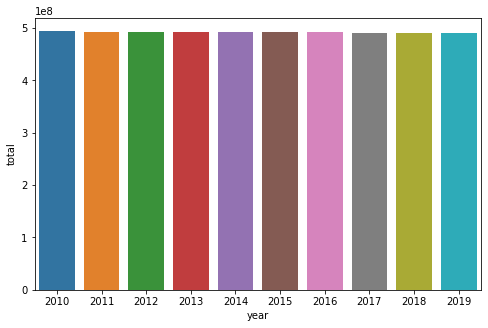

In [23]:
# 연도별 토지지목 넓이 그래프
plt.figure(figsize=(8.0, 5.0))
sns.barplot(data=year, x='year', y='total')

<BarContainer object of 10 artists>

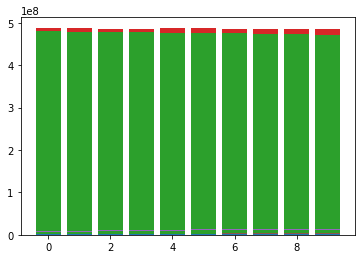

In [24]:
# 연도별 토지 넓이 현황(stacked bar)
plt.bar(range(len(year['year'])), year['orchard'])
plt.bar(range(len(year['year'])), year['pasture'], bottom=year['orchard'])
plt.bar(range(len(year['year'])), year['forest'], bottom=year['pasture'])
plt.bar(range(len(year['year'])), year['park'], bottom=year['forest'])
plt.bar(range(len(year['year'])), year['sports'], bottom=year['park'])
plt.bar(range(len(year['year'])), year['amusement'], bottom=year['sports'])

<AxesSubplot:xlabel='year', ylabel='orchard'>

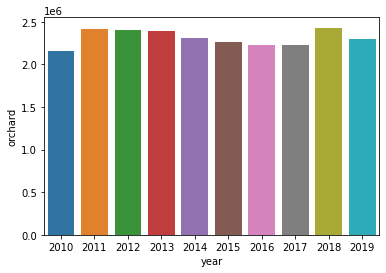

In [25]:
#
sns.barplot(data=year, x='year', y='orchard')

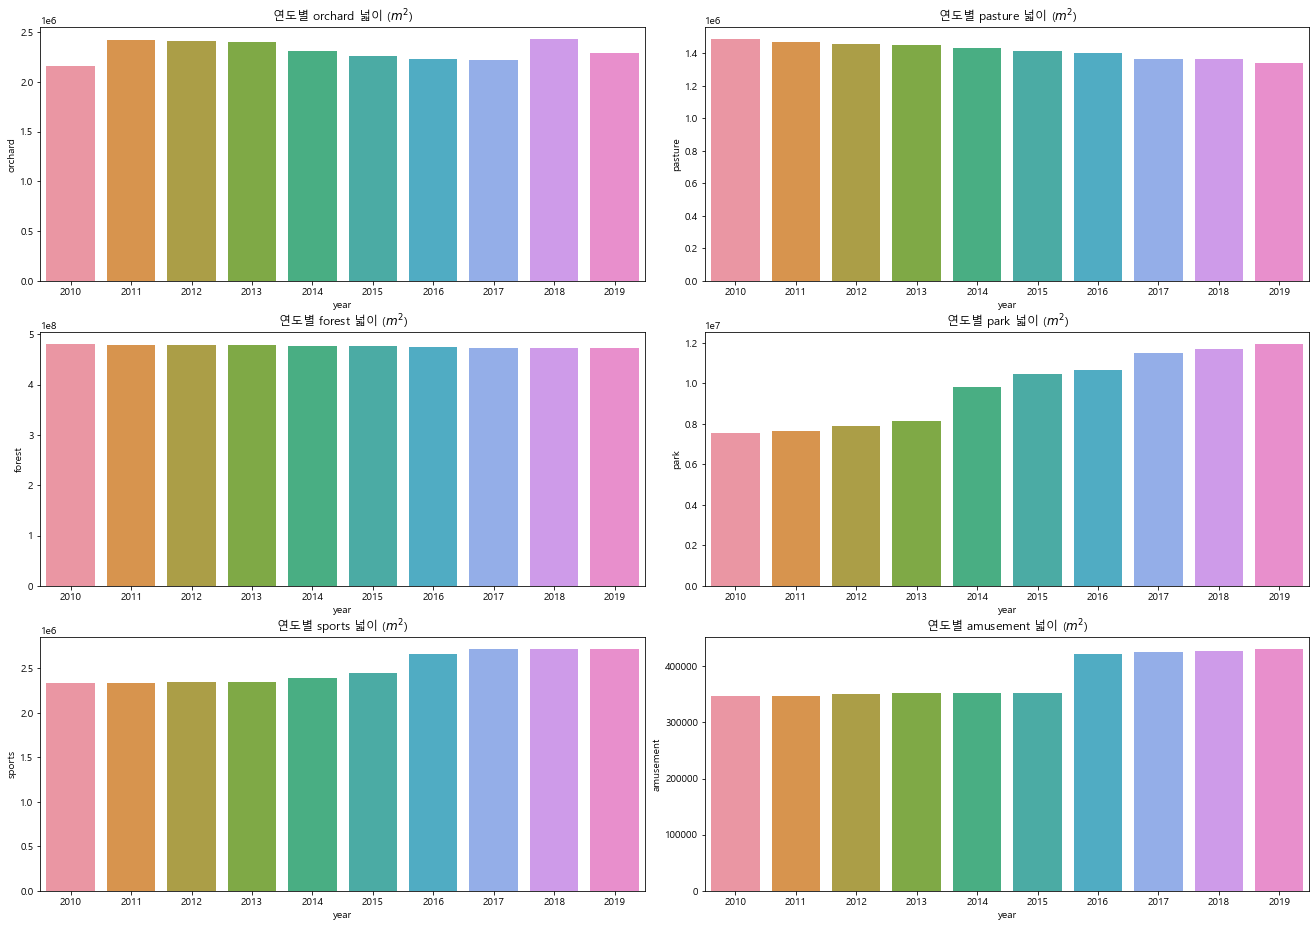

In [26]:
# 연도별 토지지목 넓이 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15.0, 15.0))
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.3, top=0.9, wspace=0.1, hspace=0.2)
sns.set_palette('Purples')
for i in range(1, 7):
    plt.subplot(3, 2, i)
    sns.barplot(data=year, x='year', y=year.iloc[:, i])
    plt.ylabel(year.columns[i])
    plt.xlabel('year')
    plt.title("연도별 {} 넓이 ($m^2$)".format(year.columns[i]))
    
    

In [27]:
# 구별 토지지목 넓이 합계
region=tree1.groupby('region2', as_index=False).sum()
region

,region2,year,orchard,pasture,forest,park,sports,amusement
0,남구,20145,0.0,0.0,4.097431e+07,26766814.6,34910.0,0.0
1,달서구,20145,303444.0,46520.0,1.936816e+08,21567651.0,1888545.0,0.0
2,달성군,20145,6412176.6,11573782.9,2.563438e+09,19534193.9,1834071.1,3345026.0
3,동구,20145,8286107.4,731820.0,1.106125e+09,13340621.0,6514766.4,269944.0
4,북구,20145,4330786.0,1603209.0,4.607247e+08,7832746.1,3399493.0,0.0
5,서구,20145,0.0,0.0,1.973824e+07,740895.3,66870.0,0.0
6,수성구,20145,3798265.0,223696.0,3.778532e+08,5466812.8,11270553.1,191145.0
7,중구,20145,0.0,0.0,0.000000e+00,2027054.2,0.0,0.0


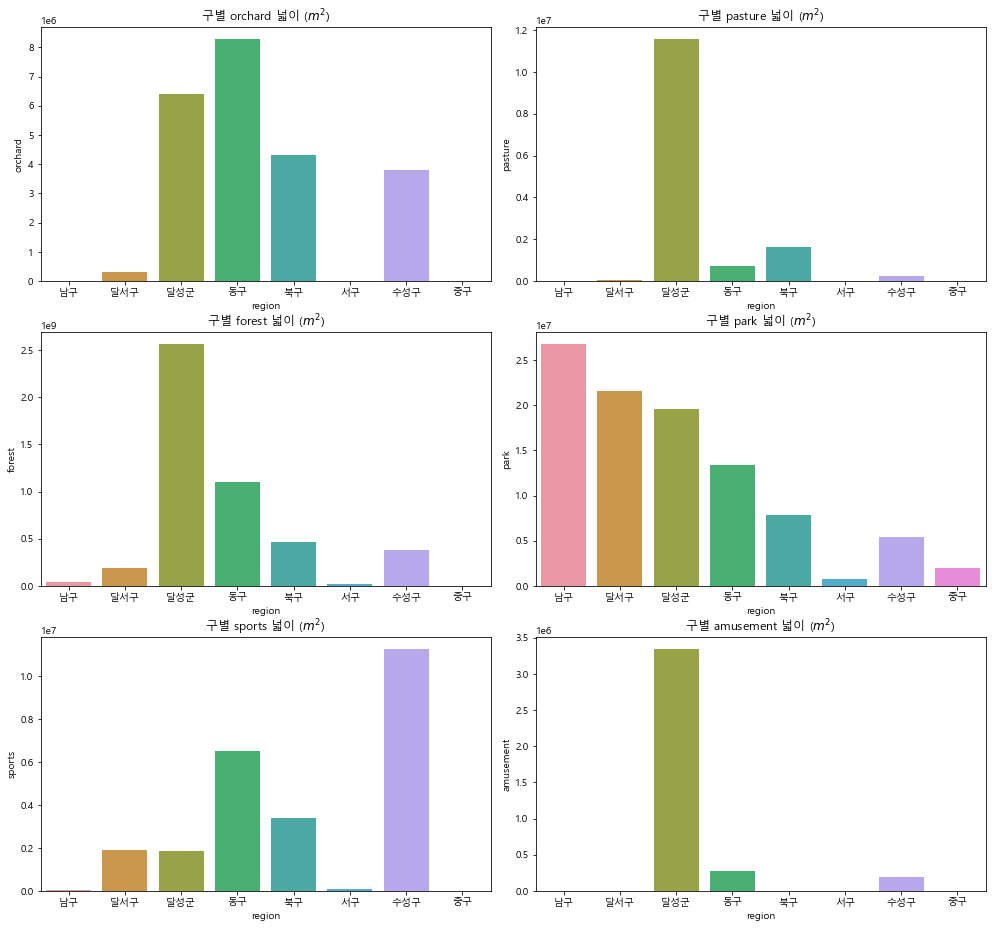

In [28]:
# 구별 토지지목 넓이 그래프
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15.0, 15.0))
plt.subplots_adjust(left=0.125, bottom=0.1, right=1, top=0.9, wspace=0.1, hspace=0.2)
sns.set_palette('Purples')
for i in range(2, 8):
    plt.subplot(3, 2, i-1)
    sns.barplot(data=region, x='region2', y=region.iloc[:, i])
    plt.ylabel(region.columns[i])
    plt.xlabel('region')
    plt.title("구별 {} 넓이 ($m^2$)".format(region.columns[i]))

In [29]:
# 연도별 구별 토지지목 합계
year_region=tree1.groupby(['year', 'region2'], as_index=False).sum()
year_region

,year,region2,orchard,pasture,forest,park,sports,amusement
0,2010,남구,0.0,0.0,4107091.7,2677733.7,3491.0,0.0
1,2010,달서구,30283.0,4832.0,19497150.1,2064684.4,188783.3,0.0
2,2010,달성군,629581.0,1189639.0,258971821.5,747991.4,80402.0,306417.0
3,2010,동구,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
4,2010,북구,446750.0,173870.0,46315286.0,676553.9,327038.0,0.0
...,...,...,...,...,...,...,...,...
75,2019,동구,854450.0,64868.0,110057610.9,1948899.4,655533.6,27960.0
76,2019,북구,390927.0,121218.0,45890326.6,947977.6,354315.0,0.0
77,2019,서구,0.0,0.0,1956055.0,82240.0,6687.0,0.0
78,2019,수성구,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0


In [30]:
# 연도별 전체 합계 계산
year_region['total']=year_region['orchard']+year_region['pasture']+year_region['forest']+year_region['park']+year_region['sports']+year_region['amusement']
year_region

,year,region2,orchard,pasture,forest,park,sports,amusement,total
0,2010,남구,0.0,0.0,4107091.7,2677733.7,3491.0,0.0,6788316.4
1,2010,달서구,30283.0,4832.0,19497150.1,2064684.4,188783.3,0.0,21785732.8
2,2010,달성군,629581.0,1189639.0,258971821.5,747991.4,80402.0,306417.0,261925851.9
3,2010,동구,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0,113519293.3
4,2010,북구,446750.0,173870.0,46315286.0,676553.9,327038.0,0.0,47939497.9
...,...,...,...,...,...,...,...,...,...
75,2019,동구,854450.0,64868.0,110057610.9,1948899.4,655533.6,27960.0,113609321.9
76,2019,북구,390927.0,121218.0,45890326.6,947977.6,354315.0,0.0,47704764.2
77,2019,서구,0.0,0.0,1956055.0,82240.0,6687.0,0.0,2044982.0
78,2019,수성구,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0,39721612.5


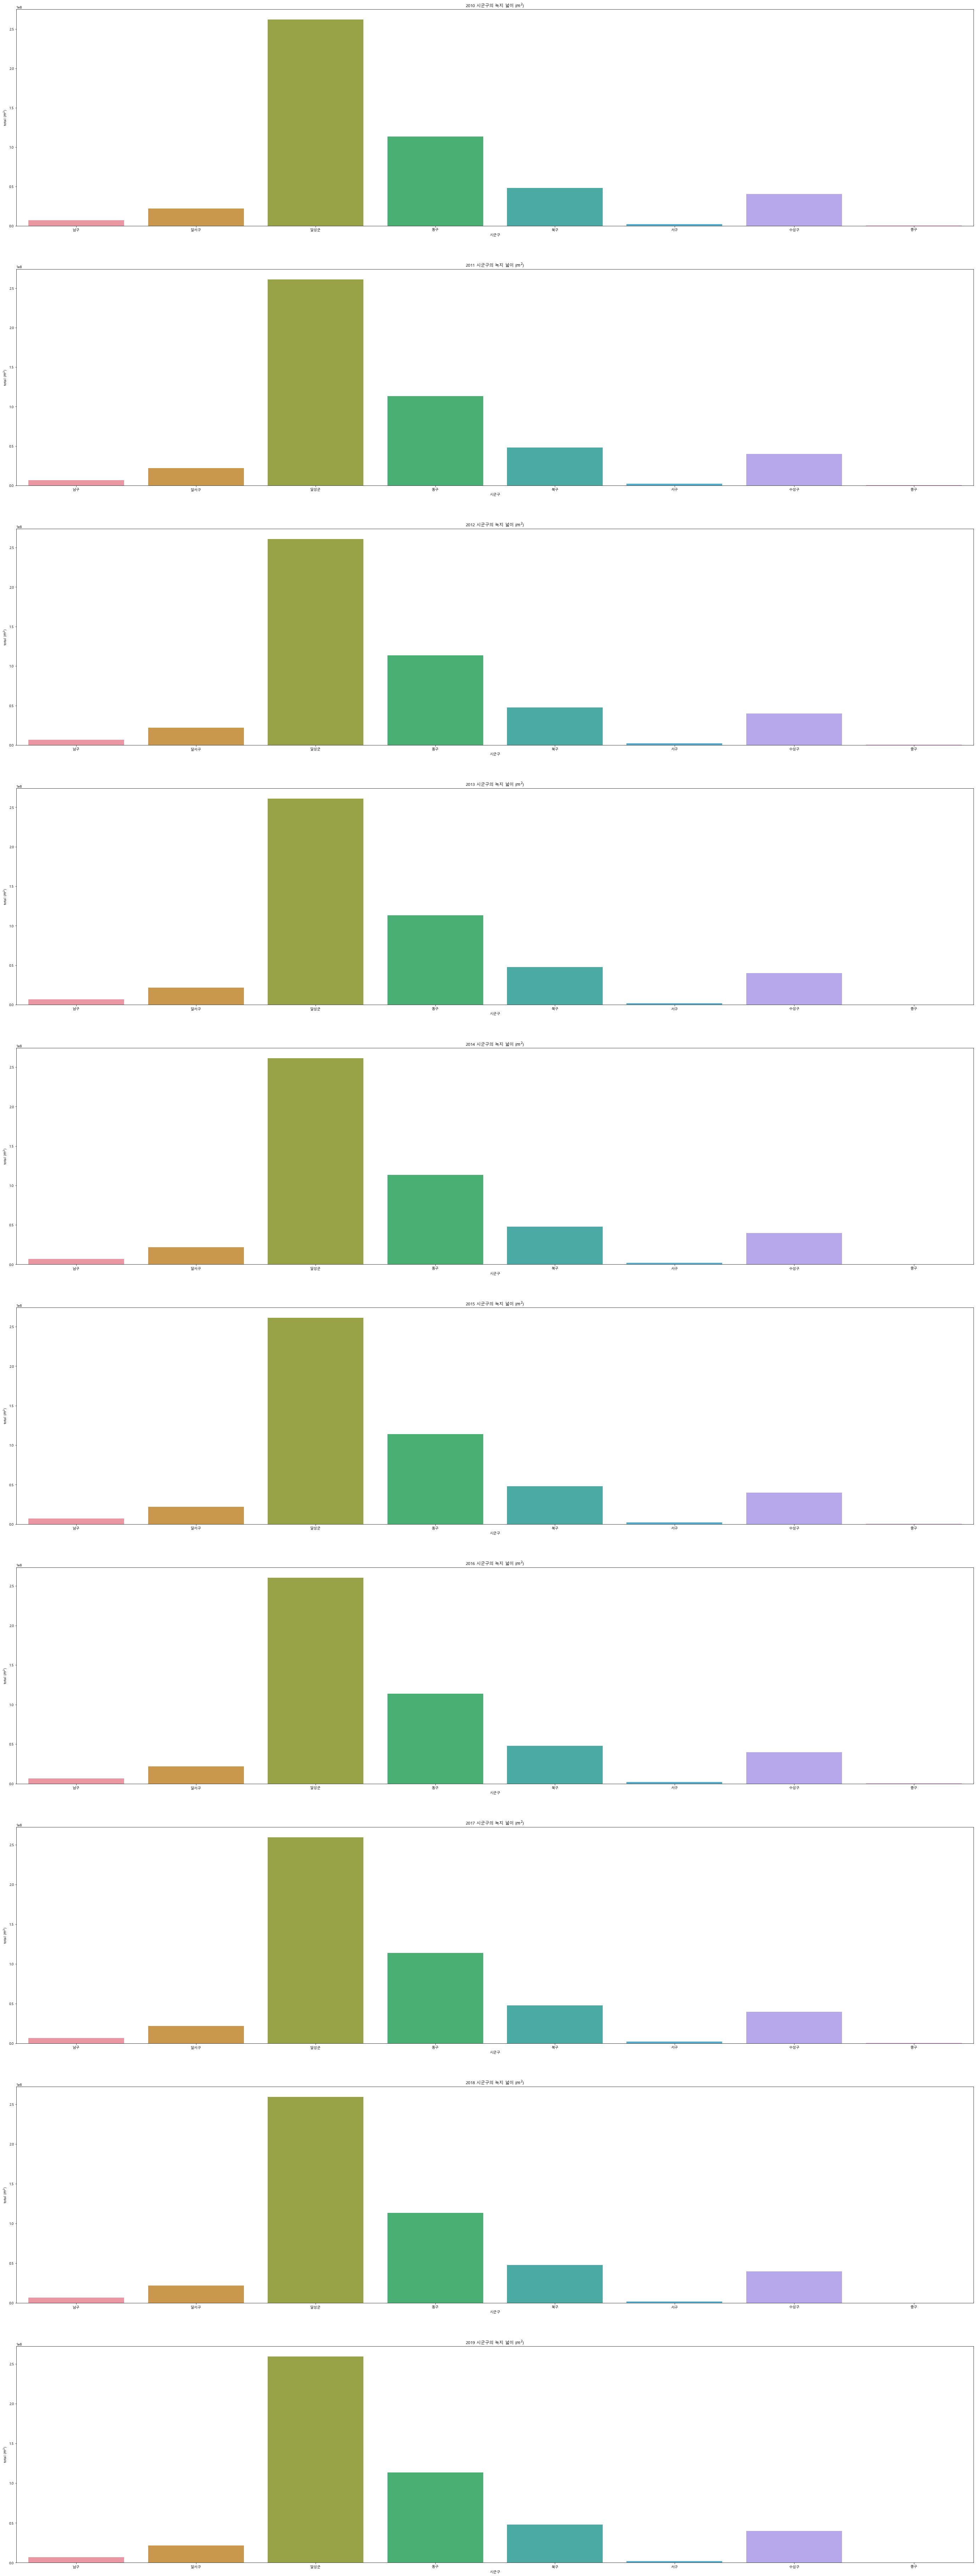

In [31]:
# 연도별 시군구의 토지지목 넓이 그래프
plt.figure(figsize=(20.0, 200.0))
plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=0.6, wspace=0.1, hspace=0.2)
sns.set_palette('Purples')
for i in range(2010, 2020):
    plt.subplot(10, 1, i-2009)
    df = year_region[year_region['year']==i]
    sns.barplot(data=df, x= 'region2', y='total')
    plt.ylabel('total ($m^2$)')
    plt.xlabel('시군구')
    plt.title("{} 시군구의 녹지 넓이 ($m^2$)".format(i))     

In [32]:
# 기상데이터와 공원데이터를 year와 region2 기준으로 병합
df_tree=pd.merge(left=df_10, right=tree1, how='left', on=['year','region2'], sort=False)
df_tree.reset_index(drop=True)
df_tree

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,...,region,HI,DI,region2,orchard,pasture,forest,park,sports,amusement
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,...,동인동,15.589444,60.74355,중구,NaN,NaN,NaN,199274.7,NaN,NaN
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,...,동인동,17.245000,62.73431,중구,NaN,NaN,NaN,199274.7,NaN,NaN
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,...,동인동,18.926667,64.65038,중구,NaN,NaN,NaN,199274.7,NaN,NaN
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,...,동인동,20.006111,65.72772,중구,NaN,NaN,NaN,199274.7,NaN,NaN
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,...,동인동,21.415556,67.04608,중구,NaN,NaN,NaN,199274.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14100475,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,...,구지면,9.679444,52.33503,달성군,NaN,NaN,NaN,NaN,NaN,NaN
14100476,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,...,구지면,9.852778,52.99350,달성군,NaN,NaN,NaN,NaN,NaN,NaN
14100477,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,...,구지면,10.738333,54.40241,달성군,NaN,NaN,NaN,NaN,NaN,NaN
14100478,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,...,구지면,12.179444,56.60598,달성군,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
# year, region2 기준으로 그룹화 - park_m2 최고값, temp 최고값 계산
group=df_tree.groupby(['year', 'region2'], as_index=False)['temp', 'HI', 'DI', 'humidity', 'orchard', 'pasture', 'forest', 'park', 'sports', 'amusement'].max()
group

C:\Users\User\AppData\Local\Temp\ipykernel_17780\4022949877.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group=df_tree.groupby(['year', 'region2'], as_index=False)['temp', 'HI', 'DI', 'humidity', 'orchard', 'pasture', 'forest', 'park', 'sports', 'amusement'].max()


,year,region2,temp,HI,DI,humidity,orchard,pasture,forest,park,sports,amusement
0,2010,남구,36.6,48.506727,88.25246,100.0,NaN,NaN,4107091.7,2677733.7,3491.0,NaN
1,2010,달서구,37.9,48.506727,88.25246,100.0,30283.0,4832.0,19497150.1,2064684.4,188783.3,NaN
2,2010,달성군,37.6,49.921482,88.78464,100.0,629581.0,1189639.0,258971821.5,747991.4,80402.0,306417.0
3,2010,동구,37.1,44.258759,86.69366,100.0,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
4,2010,북구,37.4,48.782329,88.54480,100.0,446750.0,173870.0,46315286.0,676553.9,327038.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99,2022,동구,30.0,29.076272,75.83600,100.0,NaN,NaN,NaN,NaN,NaN,NaN
100,2022,북구,29.9,28.698153,75.34099,99.0,NaN,NaN,NaN,NaN,NaN,NaN
101,2022,서구,29.4,28.345637,74.94915,99.0,NaN,NaN,NaN,NaN,NaN,NaN
102,2022,수성구,30.0,29.076272,75.83600,100.0,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
# 2020년부터 2022년 데이터 삭제
group=group[group['year']<2020]
group

,year,region2,temp,HI,DI,humidity,orchard,pasture,forest,park,sports,amusement
0,2010,남구,36.6,48.506727,88.25246,100.0,NaN,NaN,4107091.7,2677733.7,3491.0,NaN
1,2010,달서구,37.9,48.506727,88.25246,100.0,30283.0,4832.0,19497150.1,2064684.4,188783.3,NaN
2,2010,달성군,37.6,49.921482,88.78464,100.0,629581.0,1189639.0,258971821.5,747991.4,80402.0,306417.0
3,2010,동구,37.1,44.258759,86.69366,100.0,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0
4,2010,북구,37.4,48.782329,88.54480,100.0,446750.0,173870.0,46315286.0,676553.9,327038.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
75,2019,동구,36.7,43.105405,86.04238,100.0,854450.0,64868.0,110057610.9,1948899.4,655533.6,27960.0
76,2019,북구,37.1,43.288116,86.25498,100.0,390927.0,121218.0,45890326.6,947977.6,354315.0,NaN
77,2019,서구,36.2,42.257394,85.70320,100.0,NaN,NaN,1956055.0,82240.0,6687.0,NaN
78,2019,수성구,36.3,43.105405,86.04238,100.0,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0


In [233]:
# 토지지목 합계 계산
group['green total']=group.iloc[:, 6:].sum(axis=1)
group

C:\Users\User\AppData\Local\Temp\ipykernel_17780\1079670387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['green total']=group.iloc[:, 6:].sum(axis=1)


,year,region2,temp,HI,DI,humidity,orchard,pasture,forest,park,sports,amusement,green total
0,2010,남구,36.6,48.506727,88.25246,100.0,NaN,NaN,4107091.7,2677733.7,3491.0,NaN,6788316.4
1,2010,달서구,37.9,48.506727,88.25246,100.0,30283.0,4832.0,19497150.1,2064684.4,188783.3,NaN,21785732.8
2,2010,달성군,37.6,49.921482,88.78464,100.0,629581.0,1189639.0,258971821.5,747991.4,80402.0,306417.0,261925851.9
3,2010,동구,37.1,44.258759,86.69366,100.0,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0,113519293.3
4,2010,북구,37.4,48.782329,88.54480,100.0,446750.0,173870.0,46315286.0,676553.9,327038.0,NaN,47939497.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2019,동구,36.7,43.105405,86.04238,100.0,854450.0,64868.0,110057610.9,1948899.4,655533.6,27960.0,113609321.9
76,2019,북구,37.1,43.288116,86.25498,100.0,390927.0,121218.0,45890326.6,947977.6,354315.0,NaN,47704764.2
77,2019,서구,36.2,42.257394,85.70320,100.0,NaN,NaN,1956055.0,82240.0,6687.0,NaN,2044982.0
78,2019,수성구,36.3,43.105405,86.04238,100.0,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0,39721612.5


In [234]:
# 연도, 기온, 열지수, 불쾌지수, 습도, 토지지목 합계 추출
group_1=group[['year', 'temp', 'HI', 'DI', 'humidity', 'green total']]
group_1

,year,temp,HI,DI,humidity,green total
0,2010,36.6,48.506727,88.25246,100.0,6788316.4
1,2010,37.9,48.506727,88.25246,100.0,21785732.8
2,2010,37.6,49.921482,88.78464,100.0,261925851.9
3,2010,37.1,44.258759,86.69366,100.0,113519293.3
4,2010,37.4,48.782329,88.54480,100.0,47939497.9
...,...,...,...,...,...,...
75,2019,36.7,43.105405,86.04238,100.0,113609321.9
76,2019,37.1,43.288116,86.25498,100.0,47704764.2
77,2019,36.2,42.257394,85.70320,100.0,2044982.0
78,2019,36.3,43.105405,86.04238,100.0,39721612.5


In [235]:
# 연도별 최고온도, 최고 열지수, 최고불쾌지수, 녹지면적 합계
group_1=group_1.groupby('year', as_index=False).agg({'temp':'max', 'HI':'max', 'DI':'max', 'green total':'sum'})
group_1

,year,temp,HI,DI,green total
0,2010,37.9,49.921482,88.784640,494705959.5
1,2011,39.5,64.443532,94.294225,493421436.2
2,2012,37.8,45.643516,87.211510,492847923.9
3,2013,37.9,51.811268,89.106400,492934017.7
4,2014,39.1,53.174878,90.370000,493022081.2
5,2015,38.0,45.110682,86.839860,493076943.5
6,2016,38.9,51.442436,89.668000,492458165.4
7,2017,38.4,50.680682,89.538340,491243305.8
8,2018,40.4,53.281230,90.583250,491158292.0
9,2019,37.1,47.465843,87.426130,491068576.2


In [236]:
# 변수별 상관관계 확인
group_1.corr()

,year,temp,HI,DI,green total
year,1.000000,0.075260,-0.283330,-0.241107,-0.922325
temp,0.075260,1.000000,0.649480,0.734357,-0.130156
HI,-0.283330,0.649480,1.000000,0.988472,0.147236
DI,-0.241107,0.734357,0.988472,1.000000,0.105233
green total,-0.922325,-0.130156,0.147236,0.105233,1.000000


<AxesSubplot:>

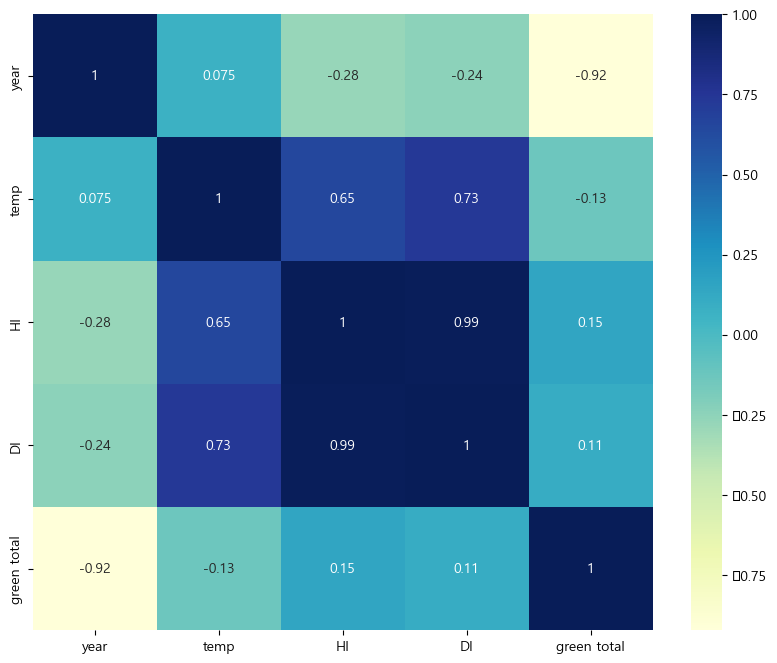

In [238]:
# heatmap으로 상관관계 확인
plt.figure(figsize=(10,8))
sns.heatmap(group_1.corr(), annot=True, cmap='YlGnBu')

- 토지지목(green total) 넓이와 나머지 변수(불쾌지수, 열지수)와의 상관계수가 0.7 이하로 나타나 상관관계가 없음.
- 토지지목과 연도의 상관계수가 -0.92로 나타나 음의 상관관계가 있음을 확인함.

Text(0.5, 1.0, '녹지넓이와 불쾌지수 산점도')

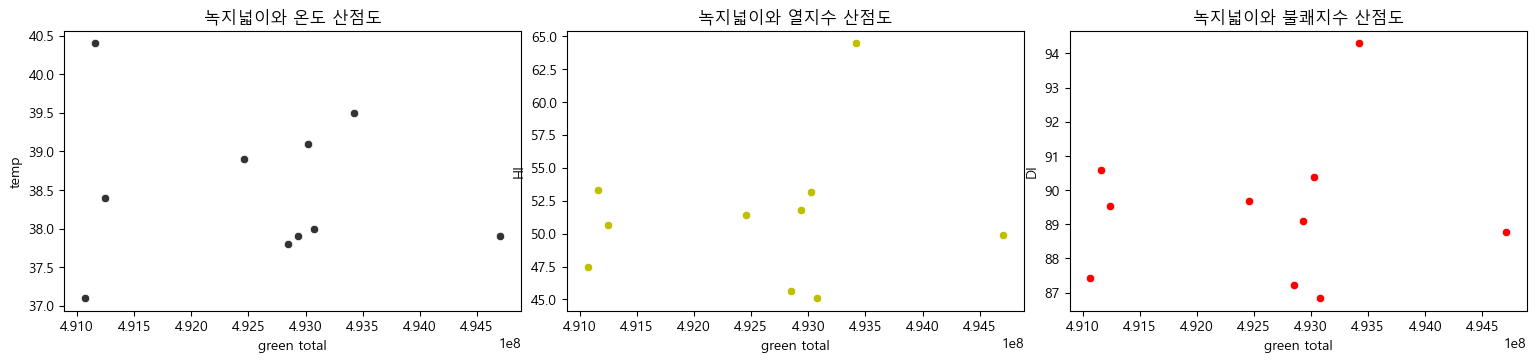

In [262]:
# 녹지넓이와 변수(온도, 열지수, 불쾌지수)와의 산점도
# plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(3,  2))
plt.subplots_adjust(left=0.125, bottom=0.1, right=5, top=1.5, wspace=0.1, hspace=0.2)

# 공원넓이와 온도 산점도
sns.scatterplot(data=group_1, x='green total', y='temp', ax=ax[0], color='.2')
ax[0].set_title('녹지넓이와 온도 산점도')

# 공원 넓이와 열지수 산점도
sns.scatterplot(data=group_1, x='green total', y='HI', ax=ax[1], color='y')
ax[1].set_title('녹지넓이와 열지수 산점도')

# 공원 넓이와 불쾌지수 산점도
sns.scatterplot(data=group_1, x='green total', y='DI', ax=ax[2], color='r')
ax[2].set_title('녹지넓이와 불쾌지수 산점도')

# # 공원 넓이와 습도 산점도
# sns.scatterplot(data=group_1, x='green total', y='humidity', ax=ax[1, 1], color='b')
# ax[1, 1].set_title('녹지넓이와 습도 산점도')

- 연도별 구의 공원넓이

In [218]:
group

,year,region2,temp,HI,DI,humidity,orchard,pasture,forest,park,sports,amusement,green total,total
0,2010,남구,36.6,48.506727,88.25246,100.0,NaN,NaN,4107091.7,2677733.7,3491.0,NaN,6788416.4,NaN
1,2010,달서구,37.9,48.506727,88.25246,100.0,30283.0,4832.0,19497150.1,2064684.4,188783.3,NaN,21785832.8,NaN
2,2010,달성군,37.6,49.921482,88.78464,100.0,629581.0,1189639.0,258971821.5,747991.4,80402.0,306417.0,261925951.9,261925851.9
3,2010,동구,37.1,44.258759,86.69366,100.0,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0,113519393.3,113519293.3
4,2010,북구,37.4,48.782329,88.54480,100.0,446750.0,173870.0,46315286.0,676553.9,327038.0,NaN,47939597.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2019,동구,36.7,43.105405,86.04238,100.0,854450.0,64868.0,110057610.9,1948899.4,655533.6,27960.0,113609421.9,113609321.9
76,2019,북구,37.1,43.288116,86.25498,100.0,390927.0,121218.0,45890326.6,947977.6,354315.0,NaN,47704864.2,NaN
77,2019,서구,36.2,42.257394,85.70320,100.0,NaN,NaN,1956055.0,82240.0,6687.0,NaN,2045082.0,NaN
78,2019,수성구,36.3,43.105405,86.04238,100.0,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0,39721712.5,39721612.5


In [219]:
# 연도별 최고 기온과 녹지면적 합계 그룹화
year_g=group.groupby('year', as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})
year_g

C:\Users\User\AppData\Local\Temp\ipykernel_17780\2701168754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_g=group.groupby('year', as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})


,year,temp,green total
0,2010,37.9,494706759.5
1,2011,39.5,493422236.2
2,2012,37.8,492848723.9
3,2013,37.9,492934817.7
4,2014,39.1,493022881.2
5,2015,38.0,493077743.5
6,2016,38.9,492458949.4
7,2017,38.4,491244104.8
8,2018,40.4,491159092.0
9,2019,37.1,491069376.2


Text(0, 0.5, 'Green Area($m^2$)')

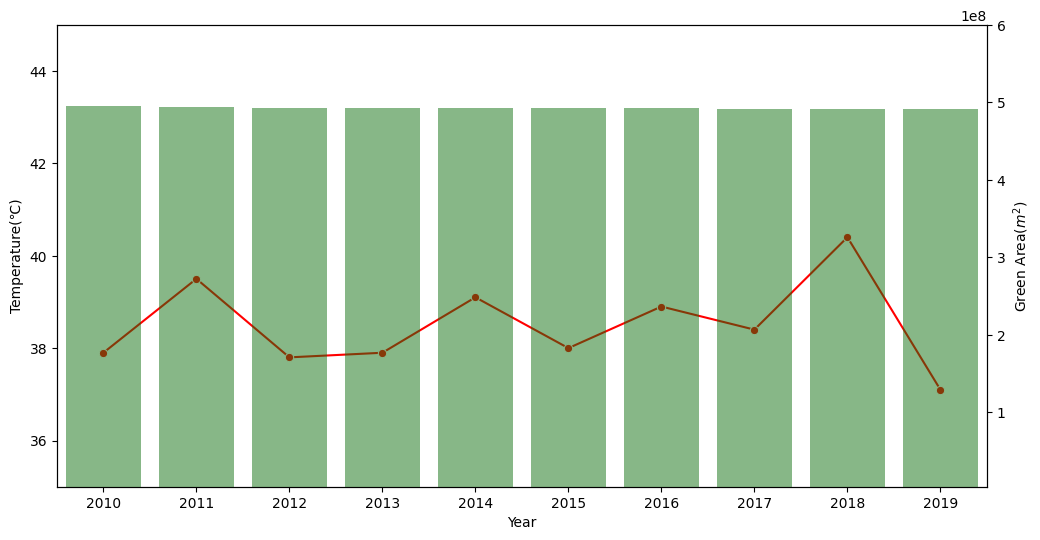

In [220]:
# 연도별 온도와 녹지면적 그래프
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature(℃)')
ax1.set_ylim(35, 45)
sns.lineplot(data = year_g['temp'], marker='o', sort = False, ax=ax1, color='red')
ax2 = ax1.twinx()
sns.barplot(data = year_g, x='year', y='green total', alpha=0.5, ax=ax2, color='green')
ax2.set_ylim(4000000, 600000000)
ax2.set_ylabel('Green Area($m^2$)')

- 녹지면적에 따른 온도 변화가 보이지 않음

In [221]:
group

,year,region2,temp,HI,DI,humidity,orchard,pasture,forest,park,sports,amusement,green total,total
0,2010,남구,36.6,48.506727,88.25246,100.0,NaN,NaN,4107091.7,2677733.7,3491.0,NaN,6788416.4,NaN
1,2010,달서구,37.9,48.506727,88.25246,100.0,30283.0,4832.0,19497150.1,2064684.4,188783.3,NaN,21785832.8,NaN
2,2010,달성군,37.6,49.921482,88.78464,100.0,629581.0,1189639.0,258971821.5,747991.4,80402.0,306417.0,261925951.9,261925851.9
3,2010,동구,37.1,44.258759,86.69366,100.0,682903.0,85214.0,111443374.0,634963.3,648769.0,24070.0,113519393.3,113519293.3
4,2010,북구,37.4,48.782329,88.54480,100.0,446750.0,173870.0,46315286.0,676553.9,327038.0,NaN,47939597.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2019,동구,36.7,43.105405,86.04238,100.0,854450.0,64868.0,110057610.9,1948899.4,655533.6,27960.0,113609421.9,113609321.9
76,2019,북구,37.1,43.288116,86.25498,100.0,390927.0,121218.0,45890326.6,947977.6,354315.0,NaN,47704864.2,NaN
77,2019,서구,36.2,42.257394,85.70320,100.0,NaN,NaN,1956055.0,82240.0,6687.0,NaN,2045082.0,NaN
78,2019,수성구,36.3,43.105405,86.04238,100.0,388626.0,20232.0,37384116.1,715909.2,1189408.2,23321.0,39721712.5,39721612.5


In [222]:
# 연도, 시군구별 최고온도, 녹지면적 합계 그룹화
y_r=group.groupby(['year', 'region2'], as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})
y_r

C:\Users\User\AppData\Local\Temp\ipykernel_17780\3423829001.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_r=group.groupby(['year', 'region2'], as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})


,year,region2,temp,green total
0,2010,남구,36.6,6788416.4
1,2010,달서구,37.9,21785832.8
2,2010,달성군,37.6,261925951.9
3,2010,동구,37.1,113519393.3
4,2010,북구,37.4,47939597.9
...,...,...,...,...
75,2019,동구,36.7,113609421.9
76,2019,북구,37.1,47704864.2
77,2019,서구,36.2,2045082.0
78,2019,수성구,36.3,39721712.5


In [223]:
years = list(y_r['year'].unique())
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

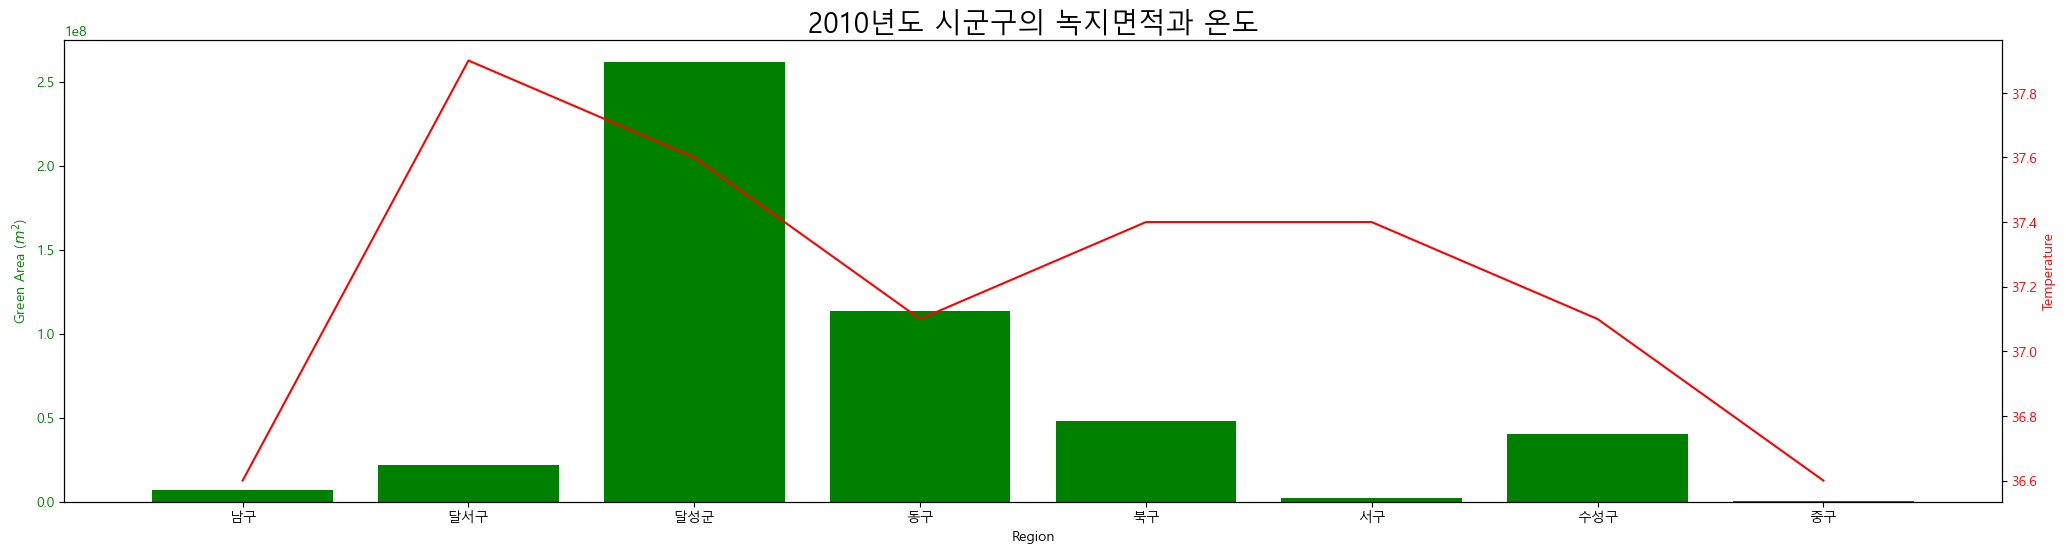

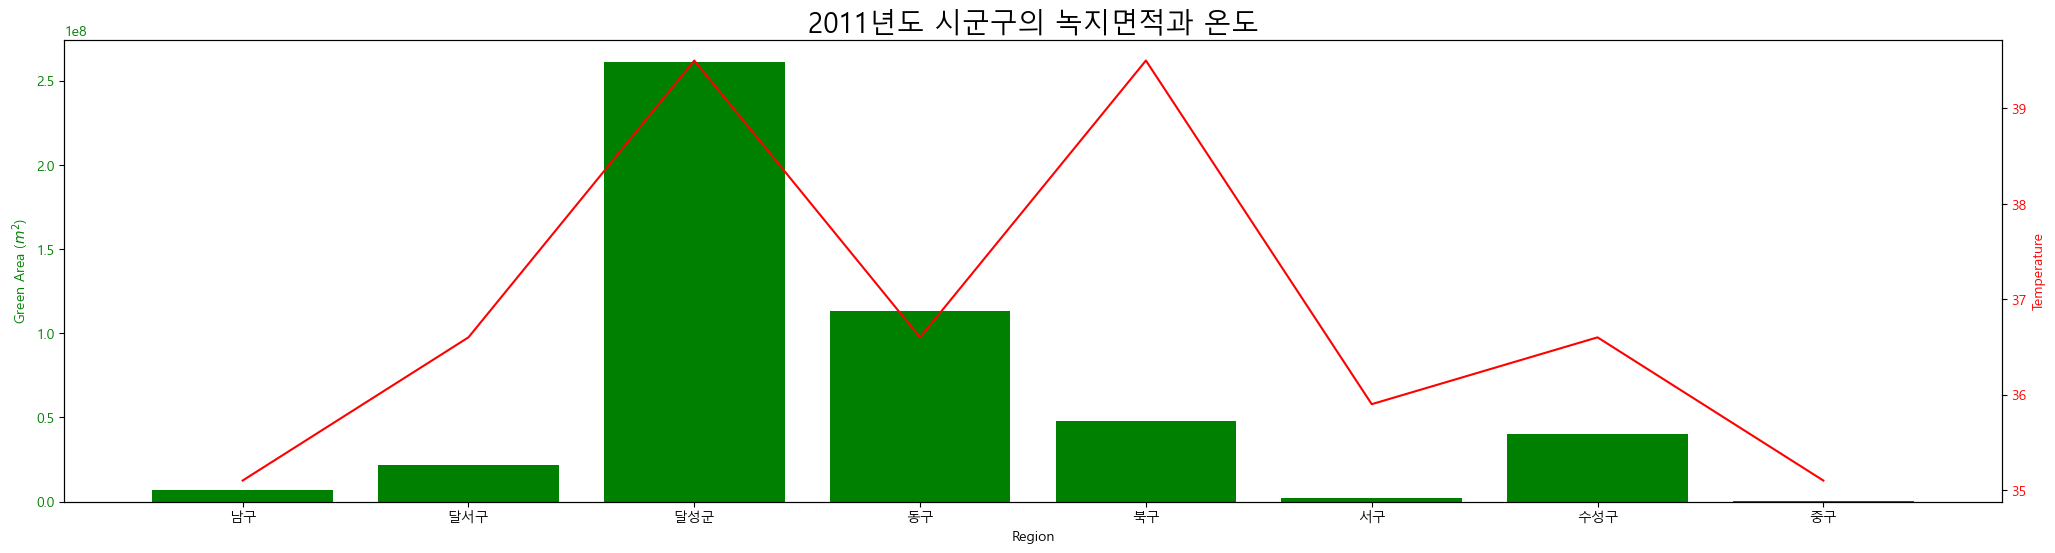

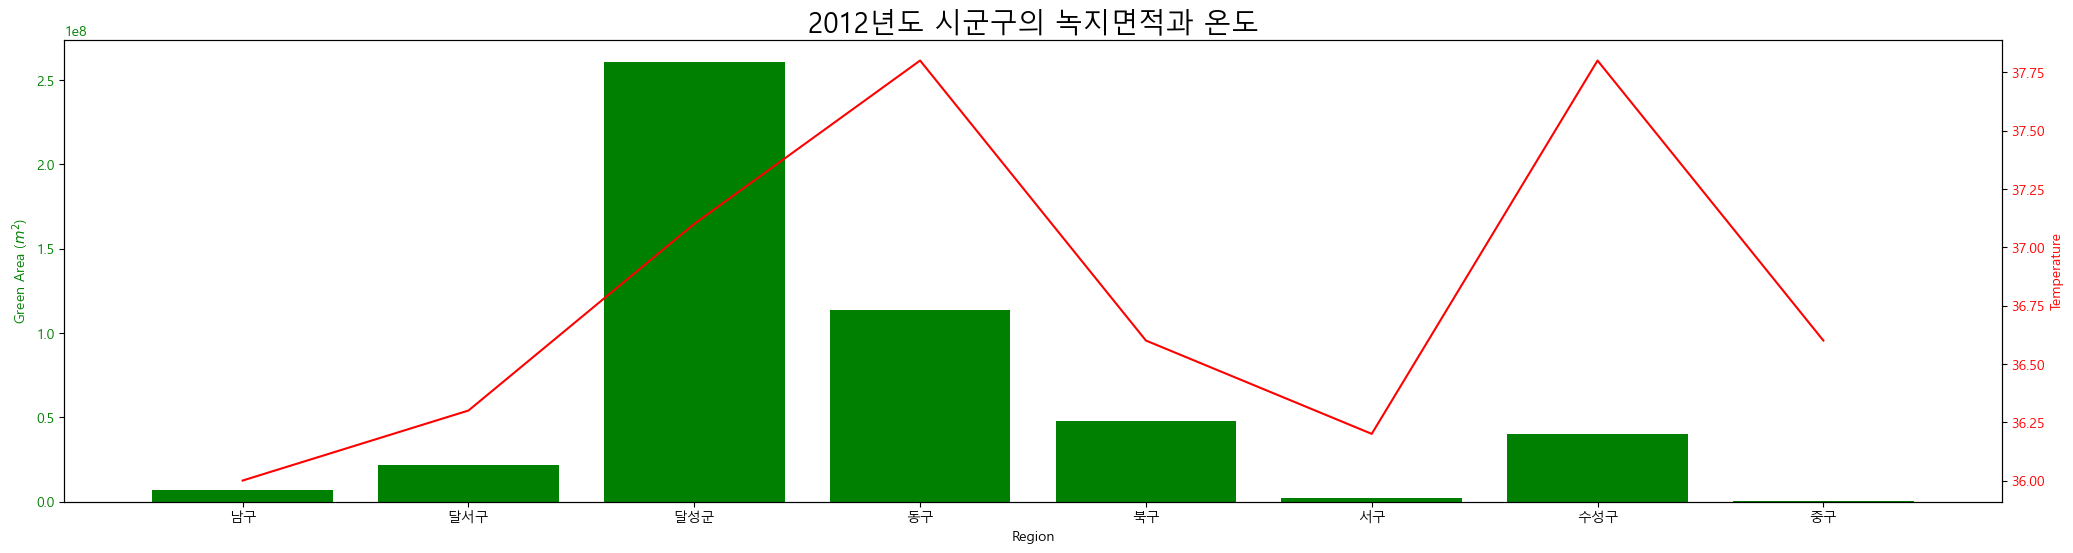

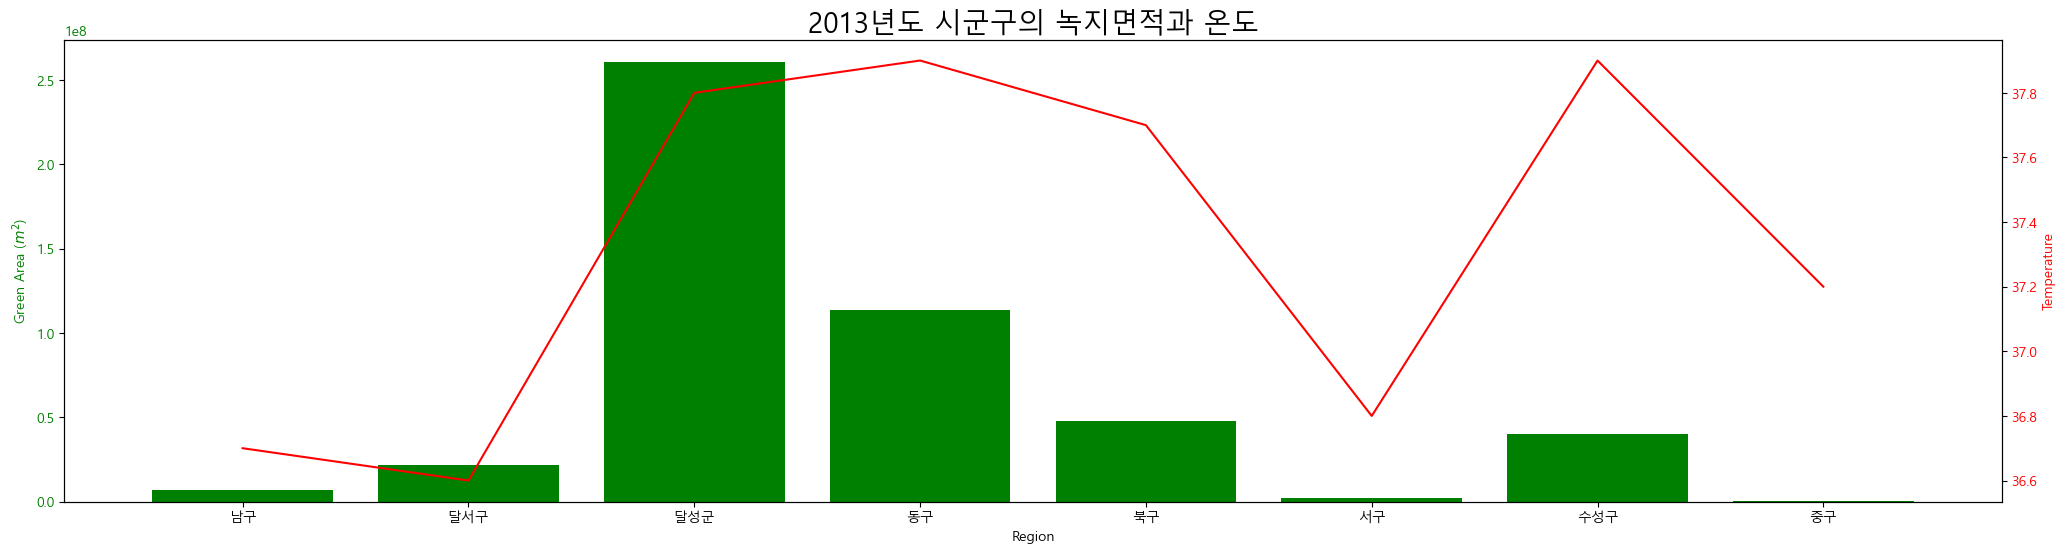

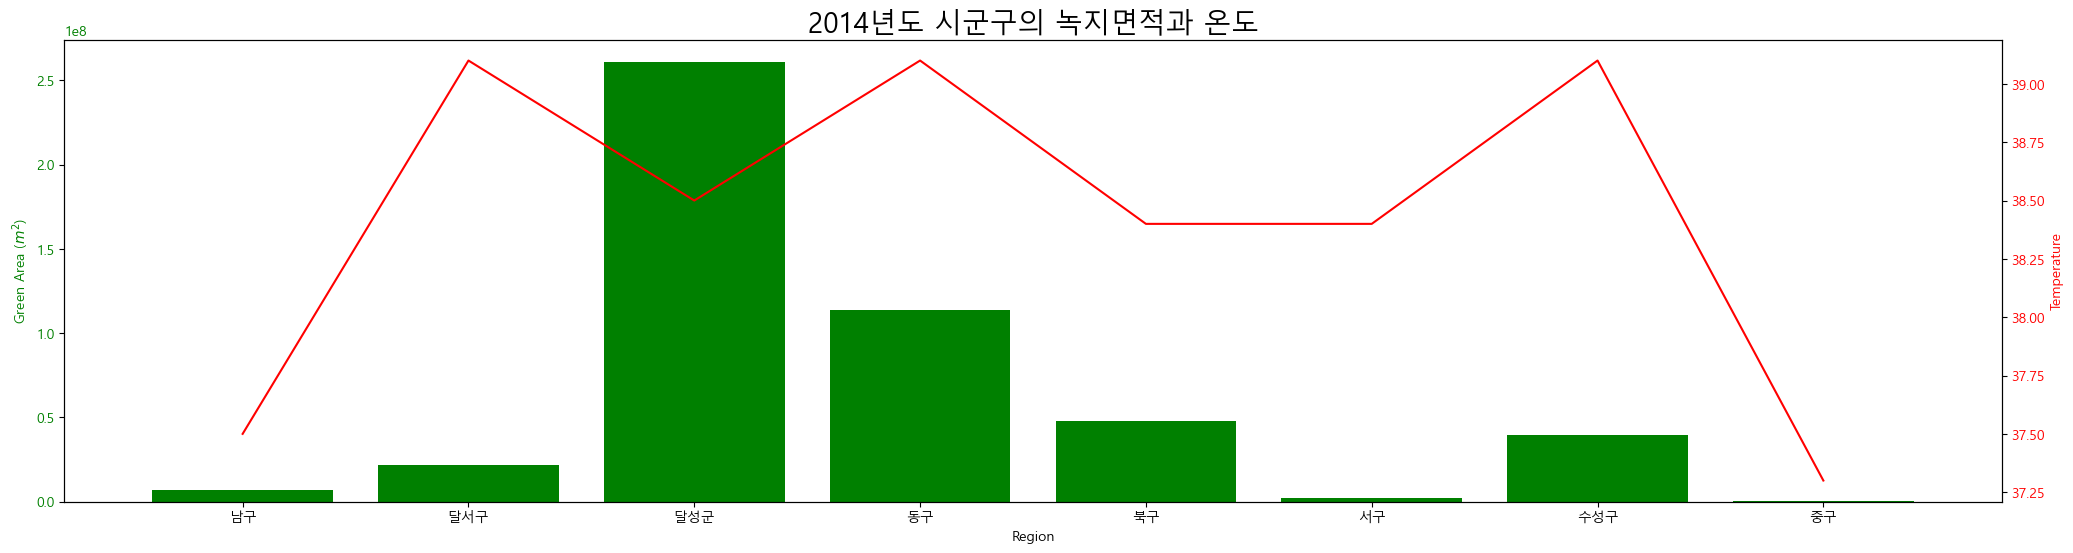

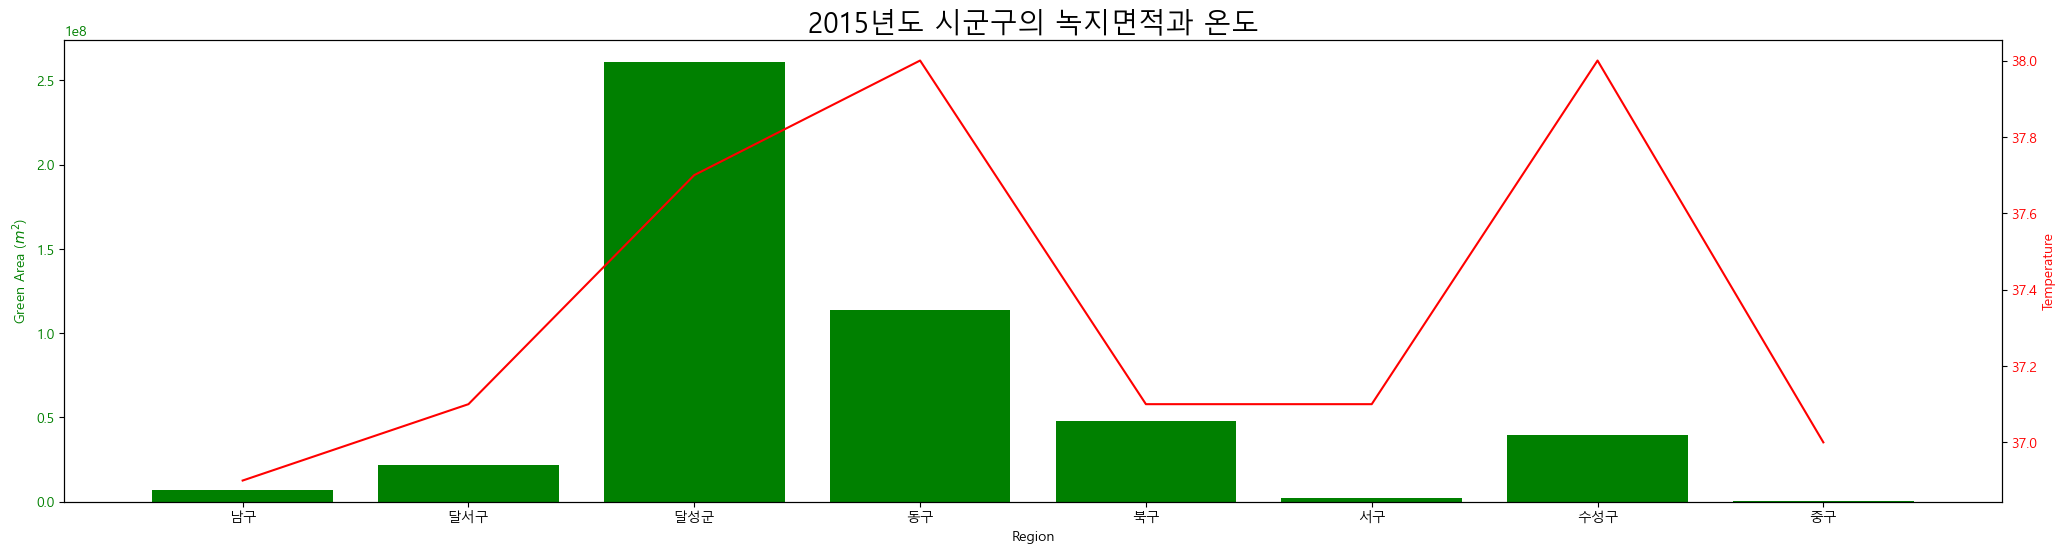

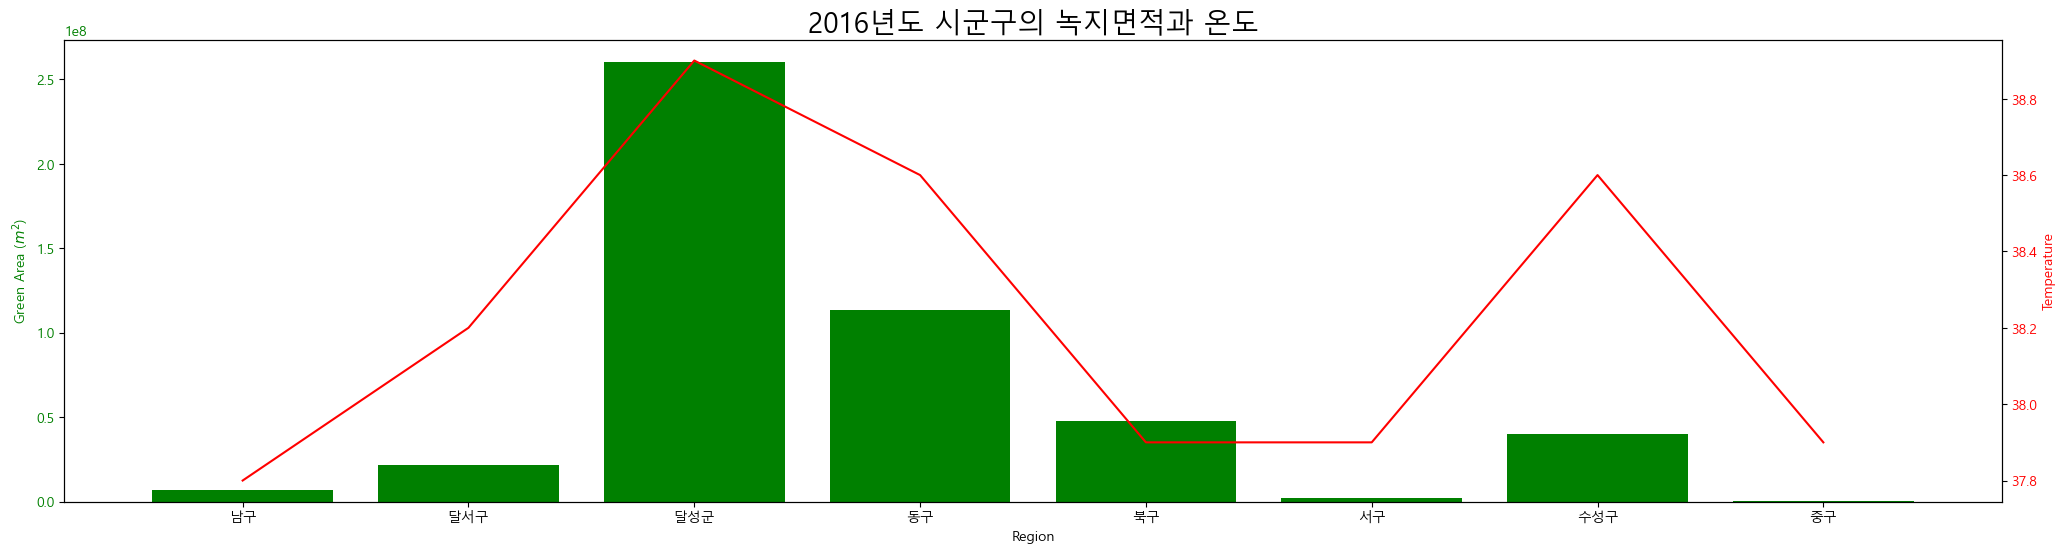

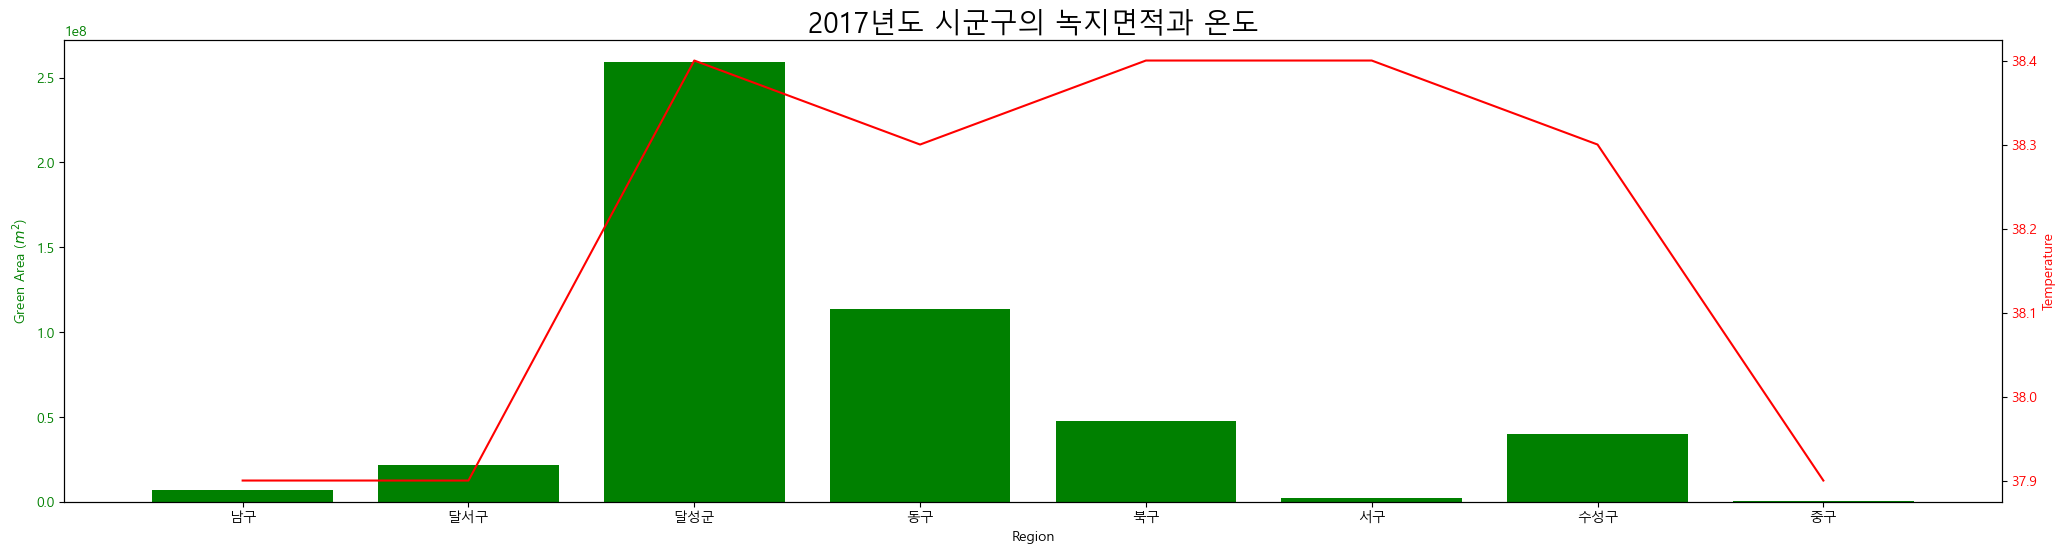

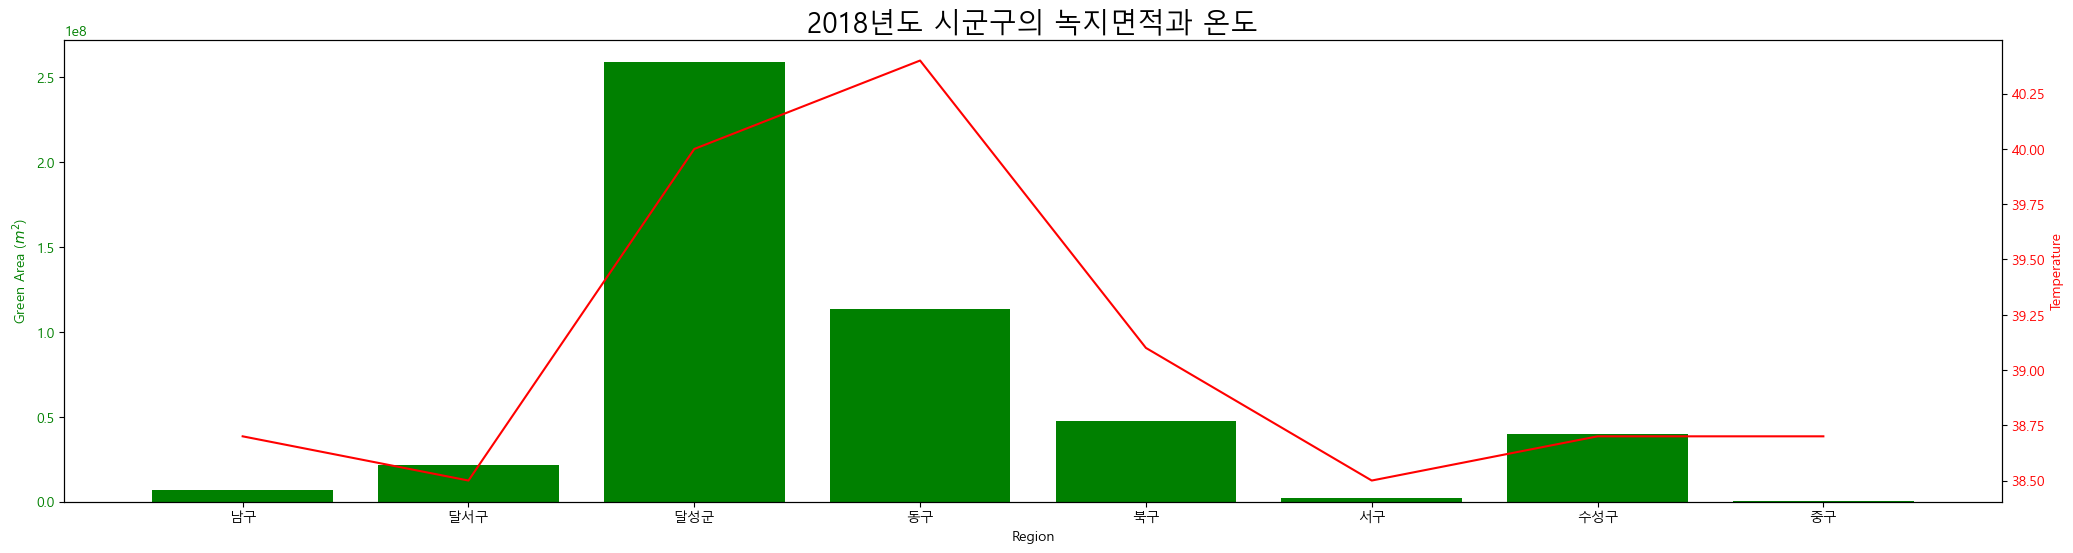

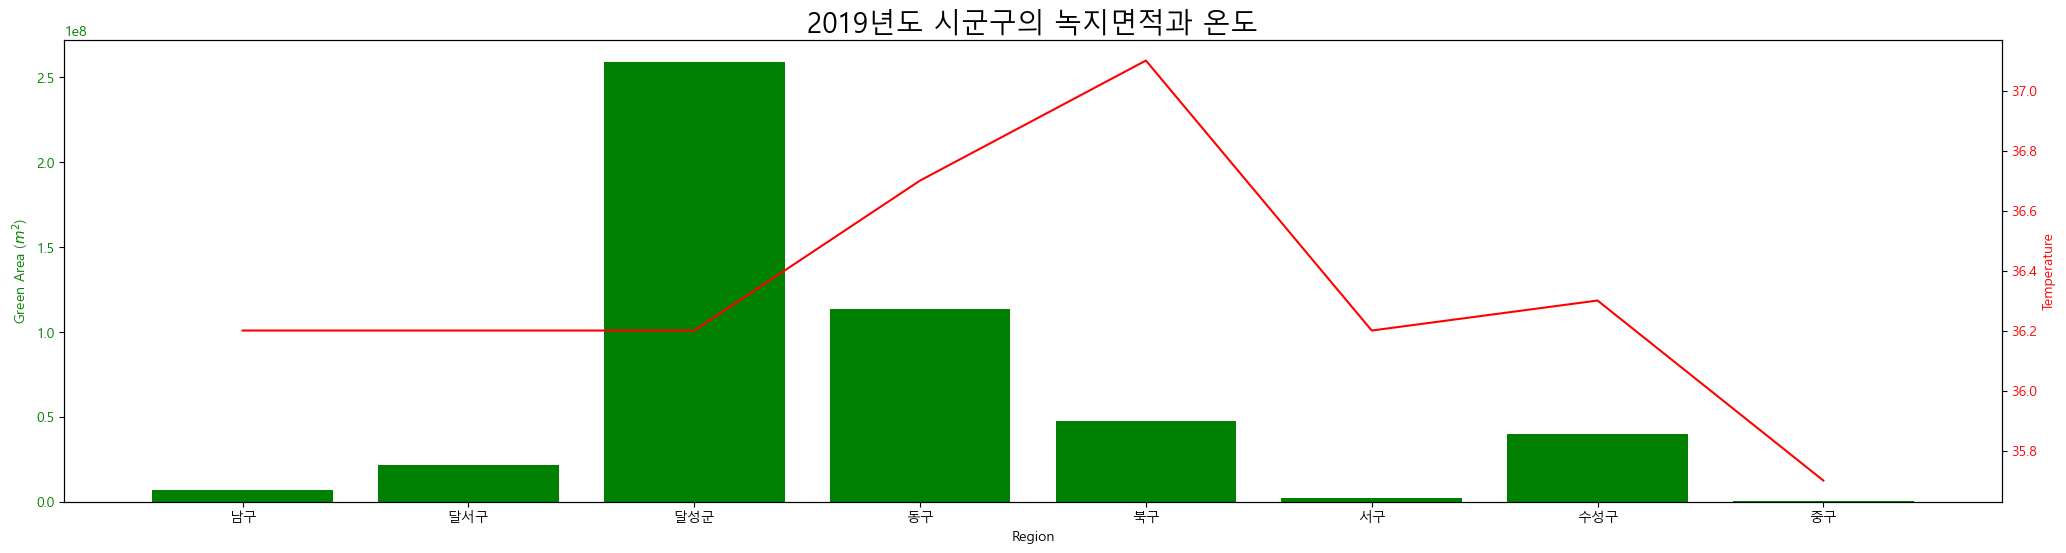

In [263]:
# 연도별 시군구의 녹지면적과 온도 그래프
plt.rcParams['font.family'] = 'Malgun Gothic'
for i in range(len(years)):
    
    y1 = list(y_r.loc[y_r['year'] == years[i], 'green total'])
    y2 = list(y_r.loc[y_r['year'] == years[i], 'temp'])
    x = list(y_r.loc[y_r['year'] == years[i], 'region2'])

    fig = plt.figure(figsize=(25,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=0)
    
    color1 = 'r'
    ax1.bar(x, y1, color=color2)
    ax1.set_xlabel('Region', fontsize = 10)
    ax1.set_ylabel('Green Area ($m^2$)', color=color2, fontsize = 10)
    ax1.set_title('{}년도 시군구의 녹지면적과 온도'.format(years[i]), fontsize = 20)
    ax1.tick_params(axis='y', labelcolor=color2)    

    color2 = 'g'
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color=color1)
    ax2.set_ylabel('Temperature', color=color1, fontsize = 10)
    ax2.tick_params(axis='y', labelcolor=color1)
    
    plt.show()

- 연도별 시군구의 녹지면적과 온도에 대한 그래프를 확인한 결과,
시군구의 녹지면적과 온도의 상관관계는 보이지 않음

- 결론
1. 녹지면적과 온도, 습도, 불쾌지수, 열지수의 상관계수가 0.7 이상이 없음 
2. 연도별 대구 전체 녹지면적에 따른 온도변화를 확인한 결과, 연도별 녹지면적의 변화가 거의 없었으며 온도가 면적에 따라 변화하는 모습을 보이지 않음
3. 연도별 시군구의 녹지면적과 온도의 상관관계는 보이지 않음

-> 녹지면적에 따른 온도 변화가 보이지 않으며 두 변수 간의 상관계수가 0.32로 상관관계가 없음